In [1]:
%load_ext autoreload
%autoreload 2
import LCN_model
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import cv2
from tqdm import tqdm
import matplotlib.patches as mpatches
import imageio
import os
import matplotlib.image as mpimg
import matplotlib.pylab as pl
from matplotlib.gridspec import GridSpec
import string

## LCN vs CNN

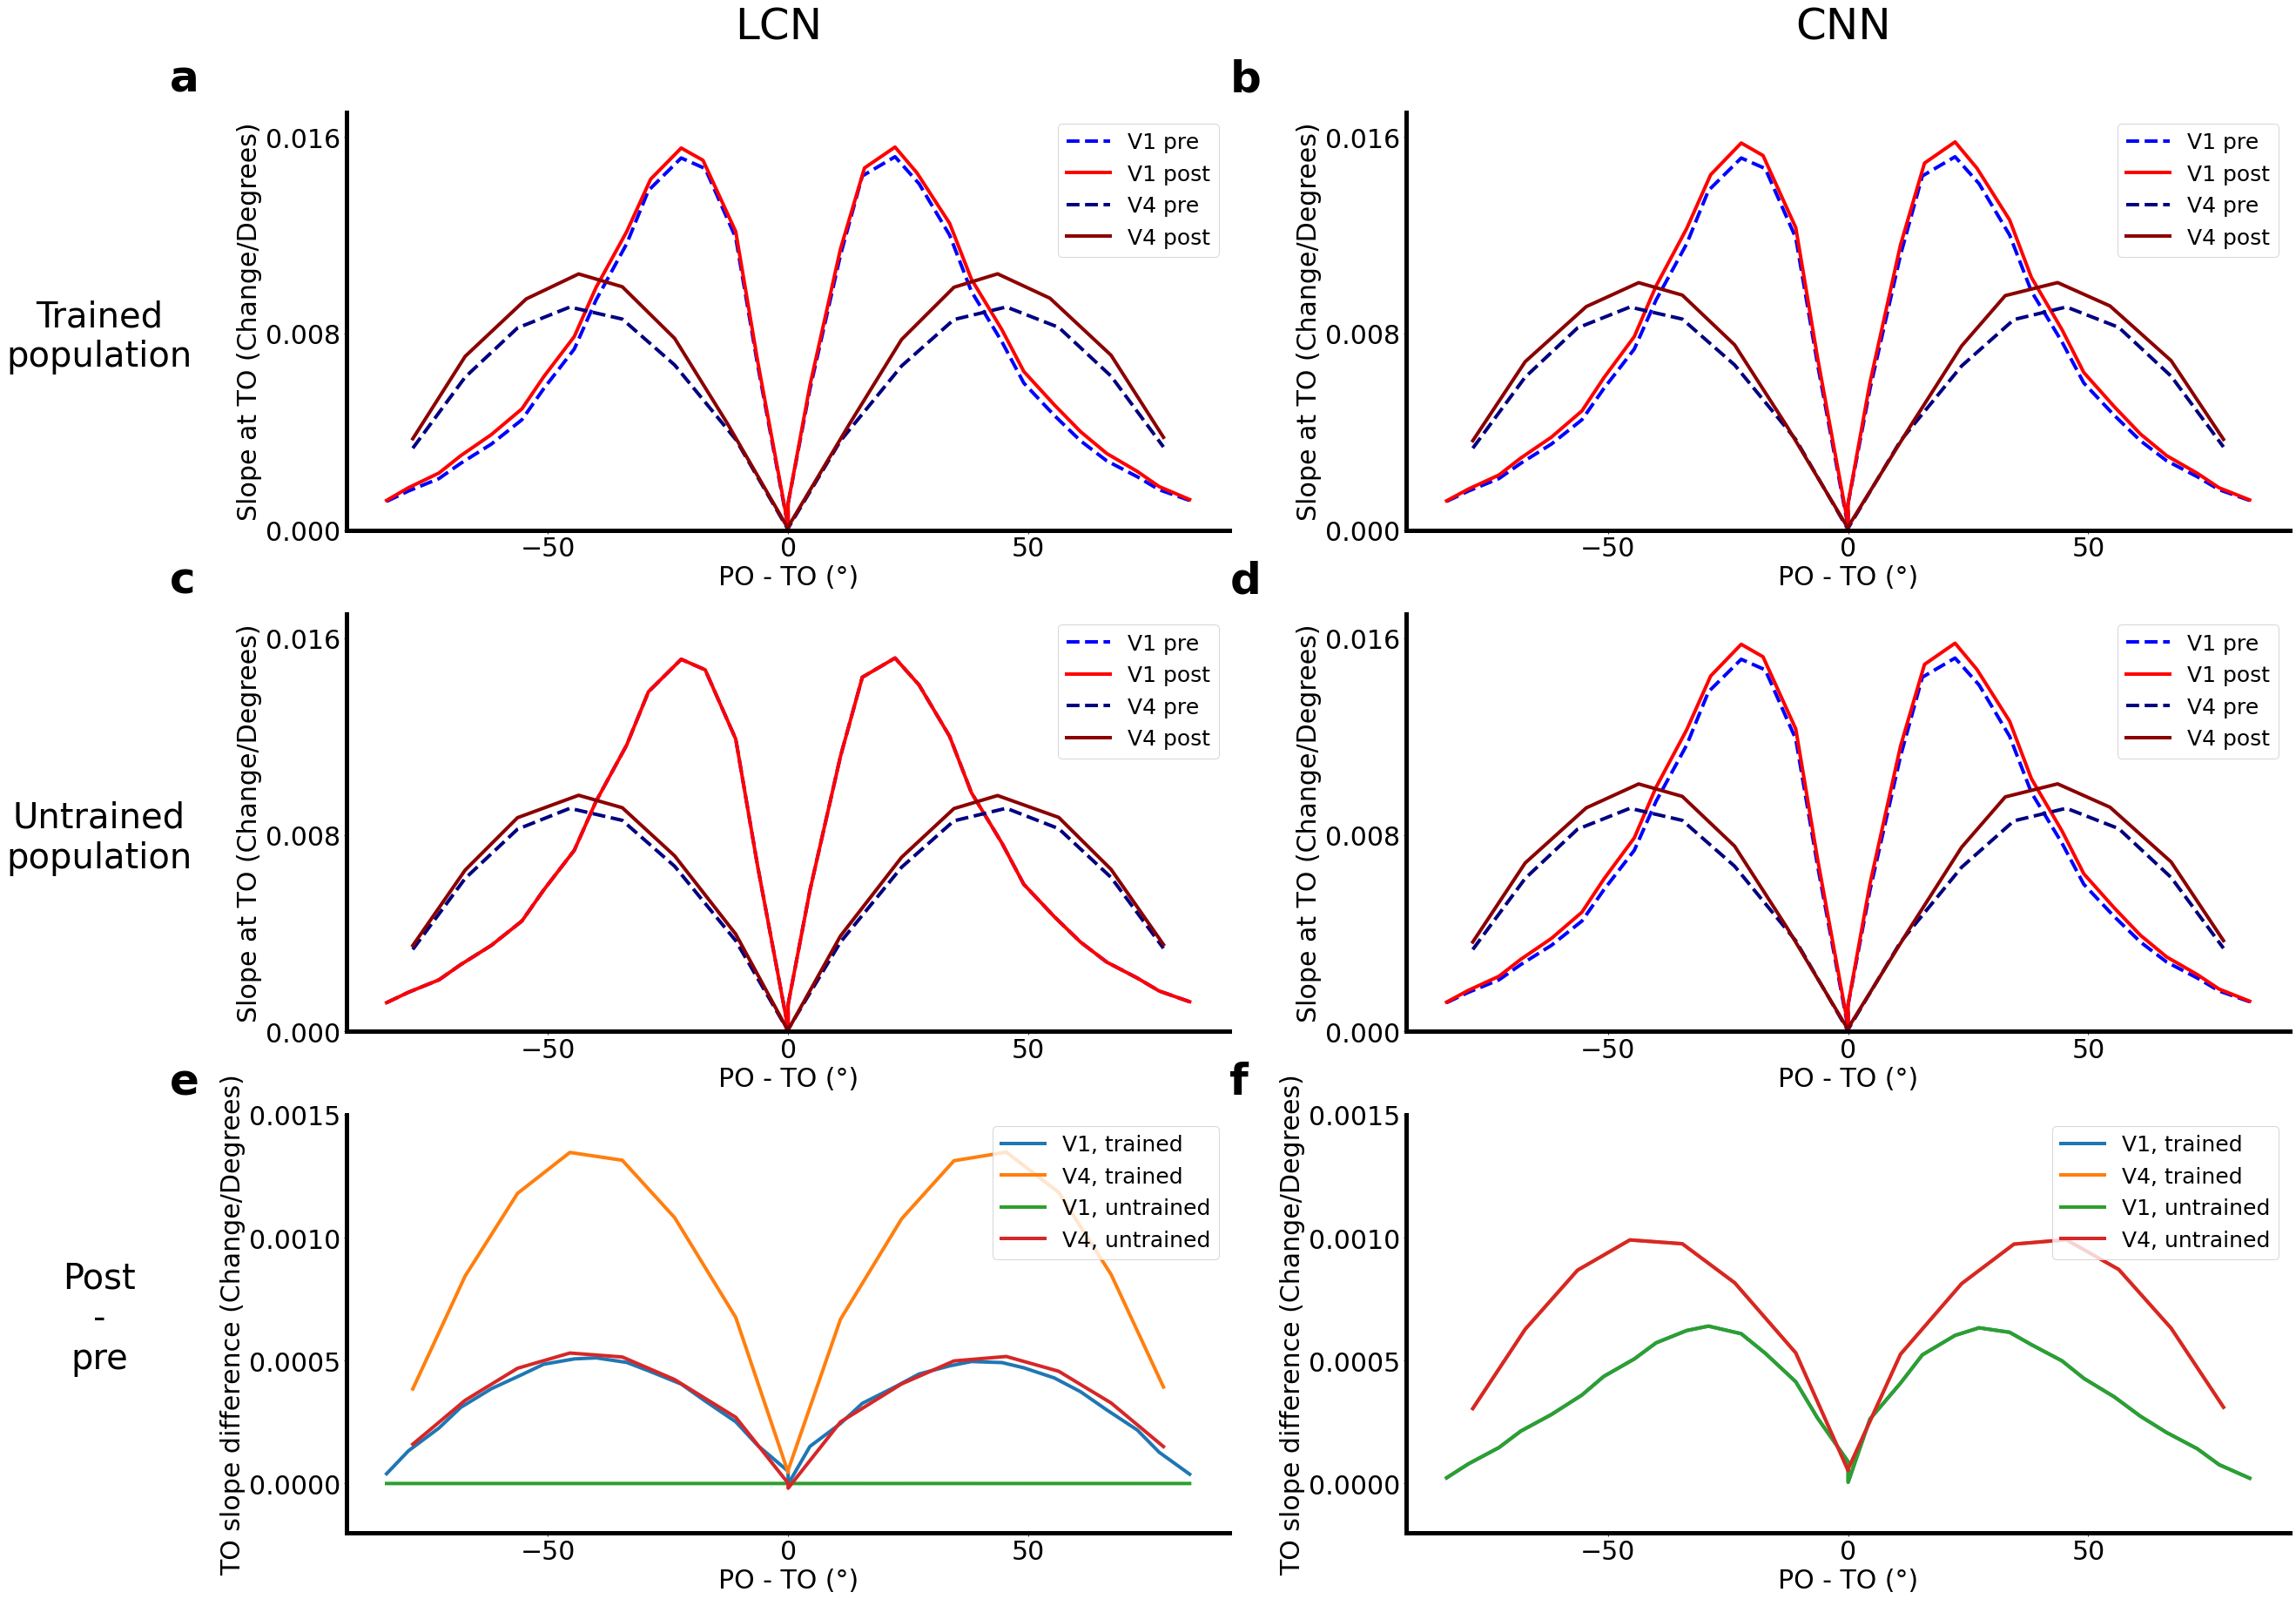

In [18]:
scales = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]
v1_scale = 0.75
v4_scale = 2
j = np.abs((torch.tensor(scales) - v1_scale)).argmin().item()
i = np.abs((torch.tensor(scales) - v4_scale)).argmin().item()
  
    
fig, axs = plt.subplots(3, 2, figsize = (40, 30))
schoups_savepath = 'trained_models/high_fixed_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/'
schoups_v1_before_range = torch.load(schoups_savepath + "v1_before_range.pt")
schoups_v1_after_range = torch.load(schoups_savepath + "v1_after_range.pt")
schoups_v4_before_range = torch.load(schoups_savepath + "v4_before_range.pt")
schoups_v4_after_range = torch.load(schoups_savepath + "v4_after_range.pt")
schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "v1_mean_before_slopes.pt")
schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "v1_mean_after_slopes.pt")
schoups_v4_before_slopes = torch.load(schoups_savepath + "v4_before_slopes.pt")
schoups_v4_after_slopes = torch.load(schoups_savepath + "v4_after_slopes.pt")
axs[0, 0].plot(schoups_v1_before_range, schoups_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[0, 0].plot(schoups_v1_after_range, schoups_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[0, 0].plot(schoups_v4_before_range, schoups_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[0, 0].plot(schoups_v4_after_range, schoups_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[0, 0].set_title("Trained\npopulation", fontsize = 40, x = -0.28, y = 0.38)
axs[0, 0].text(x = -11, y = 0.02, s = "LCN", fontsize = 50)

untrained_schoups_v1_before_range = torch.load(schoups_savepath + "untrained_v1_before_range.pt")
untrained_schoups_v1_after_range = torch.load(schoups_savepath + "untrained_v1_after_range.pt")
untrained_schoups_v4_before_range = torch.load(schoups_savepath + "untrained_v4_before_range.pt")
untrained_schoups_v4_after_range = torch.load(schoups_savepath + "untrained_v4_after_range.pt")
untrained_schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "untrained_v1_mean_before_slopes.pt")
untrained_schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "untrained_v1_mean_after_slopes.pt")
untrained_schoups_v4_before_slopes = torch.load(schoups_savepath + "untrained_v4_before_slopes.pt")
untrained_schoups_v4_after_slopes = torch.load(schoups_savepath + "untrained_v4_after_slopes.pt")
axs[1, 0].plot(untrained_schoups_v1_before_range, untrained_schoups_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[1, 0].plot(untrained_schoups_v1_after_range, untrained_schoups_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[1, 0].plot(untrained_schoups_v4_before_range, untrained_schoups_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[1, 0].plot(untrained_schoups_v4_after_range, untrained_schoups_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[1, 0].set_title("Untrained\npopulation", fontsize = 40, x = -0.28, y =0.38) 



v1_scale = 1.25
v4_scale = 2.25
j = np.abs((torch.tensor(scales) - v1_scale)).argmin().item()
i = np.abs((torch.tensor(scales) - v4_scale)).argmin().item()

conv_savepath = 'trained_models/conv_high_fixed_normalized/weight_scale_' + str(scales[j]).replace('.', '') + '_001_' + str(scales[i]).replace('.', '') + '/'
conv_v1_before_range = torch.load(conv_savepath + "v1_before_range.pt")
conv_v1_after_range = torch.load(conv_savepath + "v1_after_range.pt")
conv_v4_before_range = torch.load(conv_savepath + "v4_before_range.pt")
conv_v4_after_range = torch.load(conv_savepath + "v4_after_range.pt")
conv_v1_mean_before_slopes = torch.load(conv_savepath + "v1_mean_before_slopes.pt")
conv_v1_mean_after_slopes = torch.load(conv_savepath + "v1_mean_after_slopes.pt")
conv_v4_before_slopes = torch.load(conv_savepath + "v4_before_slopes.pt")
conv_v4_after_slopes = torch.load(conv_savepath + "v4_after_slopes.pt")
axs[0, 1].plot(conv_v1_before_range, conv_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[0, 1].plot(conv_v1_after_range, conv_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[0, 1].plot(conv_v4_before_range, conv_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[0, 1].plot(conv_v4_after_range, conv_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[0, 1].text(x = -11, y = 0.02, s = "CNN", fontsize = 50)


axs[1, 1].plot(conv_v1_before_range, conv_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[1, 1].plot(conv_v1_after_range, conv_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[1, 1].plot(conv_v4_before_range, conv_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[1, 1].plot(conv_v4_after_range, conv_v4_after_slopes, color = 'darkred', linewidth = 4)

# gs = GridSpec(nrows = 3, ncols = 2)
# ax2 = fig.add_subplot(gs[2, :])
diff1 = [schoups_v1_mean_after_slopes[i] - schoups_v1_mean_before_slopes[i] for i in range(len(schoups_v1_mean_after_slopes))]
diff2 = [schoups_v4_after_slopes[i] - schoups_v4_before_slopes[i] for i in range(len(schoups_v4_after_slopes))]
diff3 = [untrained_schoups_v1_mean_after_slopes[i] - untrained_schoups_v1_mean_before_slopes[i] for i in range(len(untrained_schoups_v1_mean_after_slopes))]
diff4 = [untrained_schoups_v4_after_slopes[i] - untrained_schoups_v4_before_slopes[i] for i in range(len(untrained_schoups_v4_after_slopes))]

diff5 = [conv_v1_mean_after_slopes[i] - conv_v1_mean_before_slopes[i] for i in range(len(conv_v1_mean_after_slopes))]
diff6 = [conv_v4_after_slopes[i] - conv_v4_before_slopes[i] for i in range(len(conv_v4_after_slopes))]
diff7 = [conv_v1_mean_after_slopes[i] - conv_v1_mean_before_slopes[i] for i in range(len(conv_v1_mean_after_slopes))]
diff8 = [conv_v4_after_slopes[i] - conv_v4_before_slopes[i] for i in range(len(conv_v4_after_slopes))]
axs[2, 0].plot(schoups_v1_before_range, diff1, linewidth = 4)
axs[2, 0].plot(schoups_v4_before_range, diff2, linewidth = 4)
axs[2, 0].plot(untrained_schoups_v1_before_range, diff3, linewidth = 4)
axs[2, 0].plot(untrained_schoups_v4_before_range, diff4, linewidth = 4)
axs[2, 0].legend(["V1, trained", "V4, trained", 
             "V1, untrained", "V4, untrained"], fontsize = 25, loc = 'upper right')
axs[2, 0].set_title("Post\n-\npre", fontsize = 40, x = -0.28, y =0.38) 
axs[2, 1].plot(conv_v1_before_range, diff5, linewidth = 4)
axs[2, 1].plot(conv_v4_before_range, diff6, linewidth = 4)
axs[2, 1].plot(conv_v1_before_range, diff7, linewidth = 4)
axs[2, 1].plot(conv_v4_before_range, diff8, linewidth = 4)
axs[2, 1].legend(["V1, trained", "V4, trained", 
             "V1, untrained", "V4, untrained"], fontsize = 25, loc = 'upper right')


for i in range(3):
    for j in range(2):
        axs[i, j].tick_params(axis = 'x', labelsize = 30)
        axs[i, j].tick_params(axis = 'y', labelsize = 30)
        axs[i, j].set_xticks([-50, 0, 50])
        axs[i, j].set_xlabel("PO - TO (°)", fontsize = 30)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['left'].set_linewidth(5)
        axs[i, j].spines['bottom'].set_linewidth(5)
        axs[2, j].set_ylim(-0.0002, 0.0015)
        axs[2, j].set_yticks([0, 0.0005, 0.001, 0.0015])
        axs[2, j].set_ylabel("TO slope difference (Change/Degrees)", fontsize = 30)
        
        if i!= 2:
            axs[i, j].set_yticks([0, 0.008, 0.016])
            axs[i, j].set_ylim(0, 0.017)
            axs[i, j].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 25)
            axs[i, j].set_ylabel("Slope at TO (Change/Degrees)", fontsize = 30)

for n, ax in enumerate(axs.flat):
    ax.text(-0.2, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=50, weight='bold')

# plt.tight_layout()
plt.savefig("Fig 2.jpeg", bbox_inches = 'tight')


## Schoups vs Ghose 

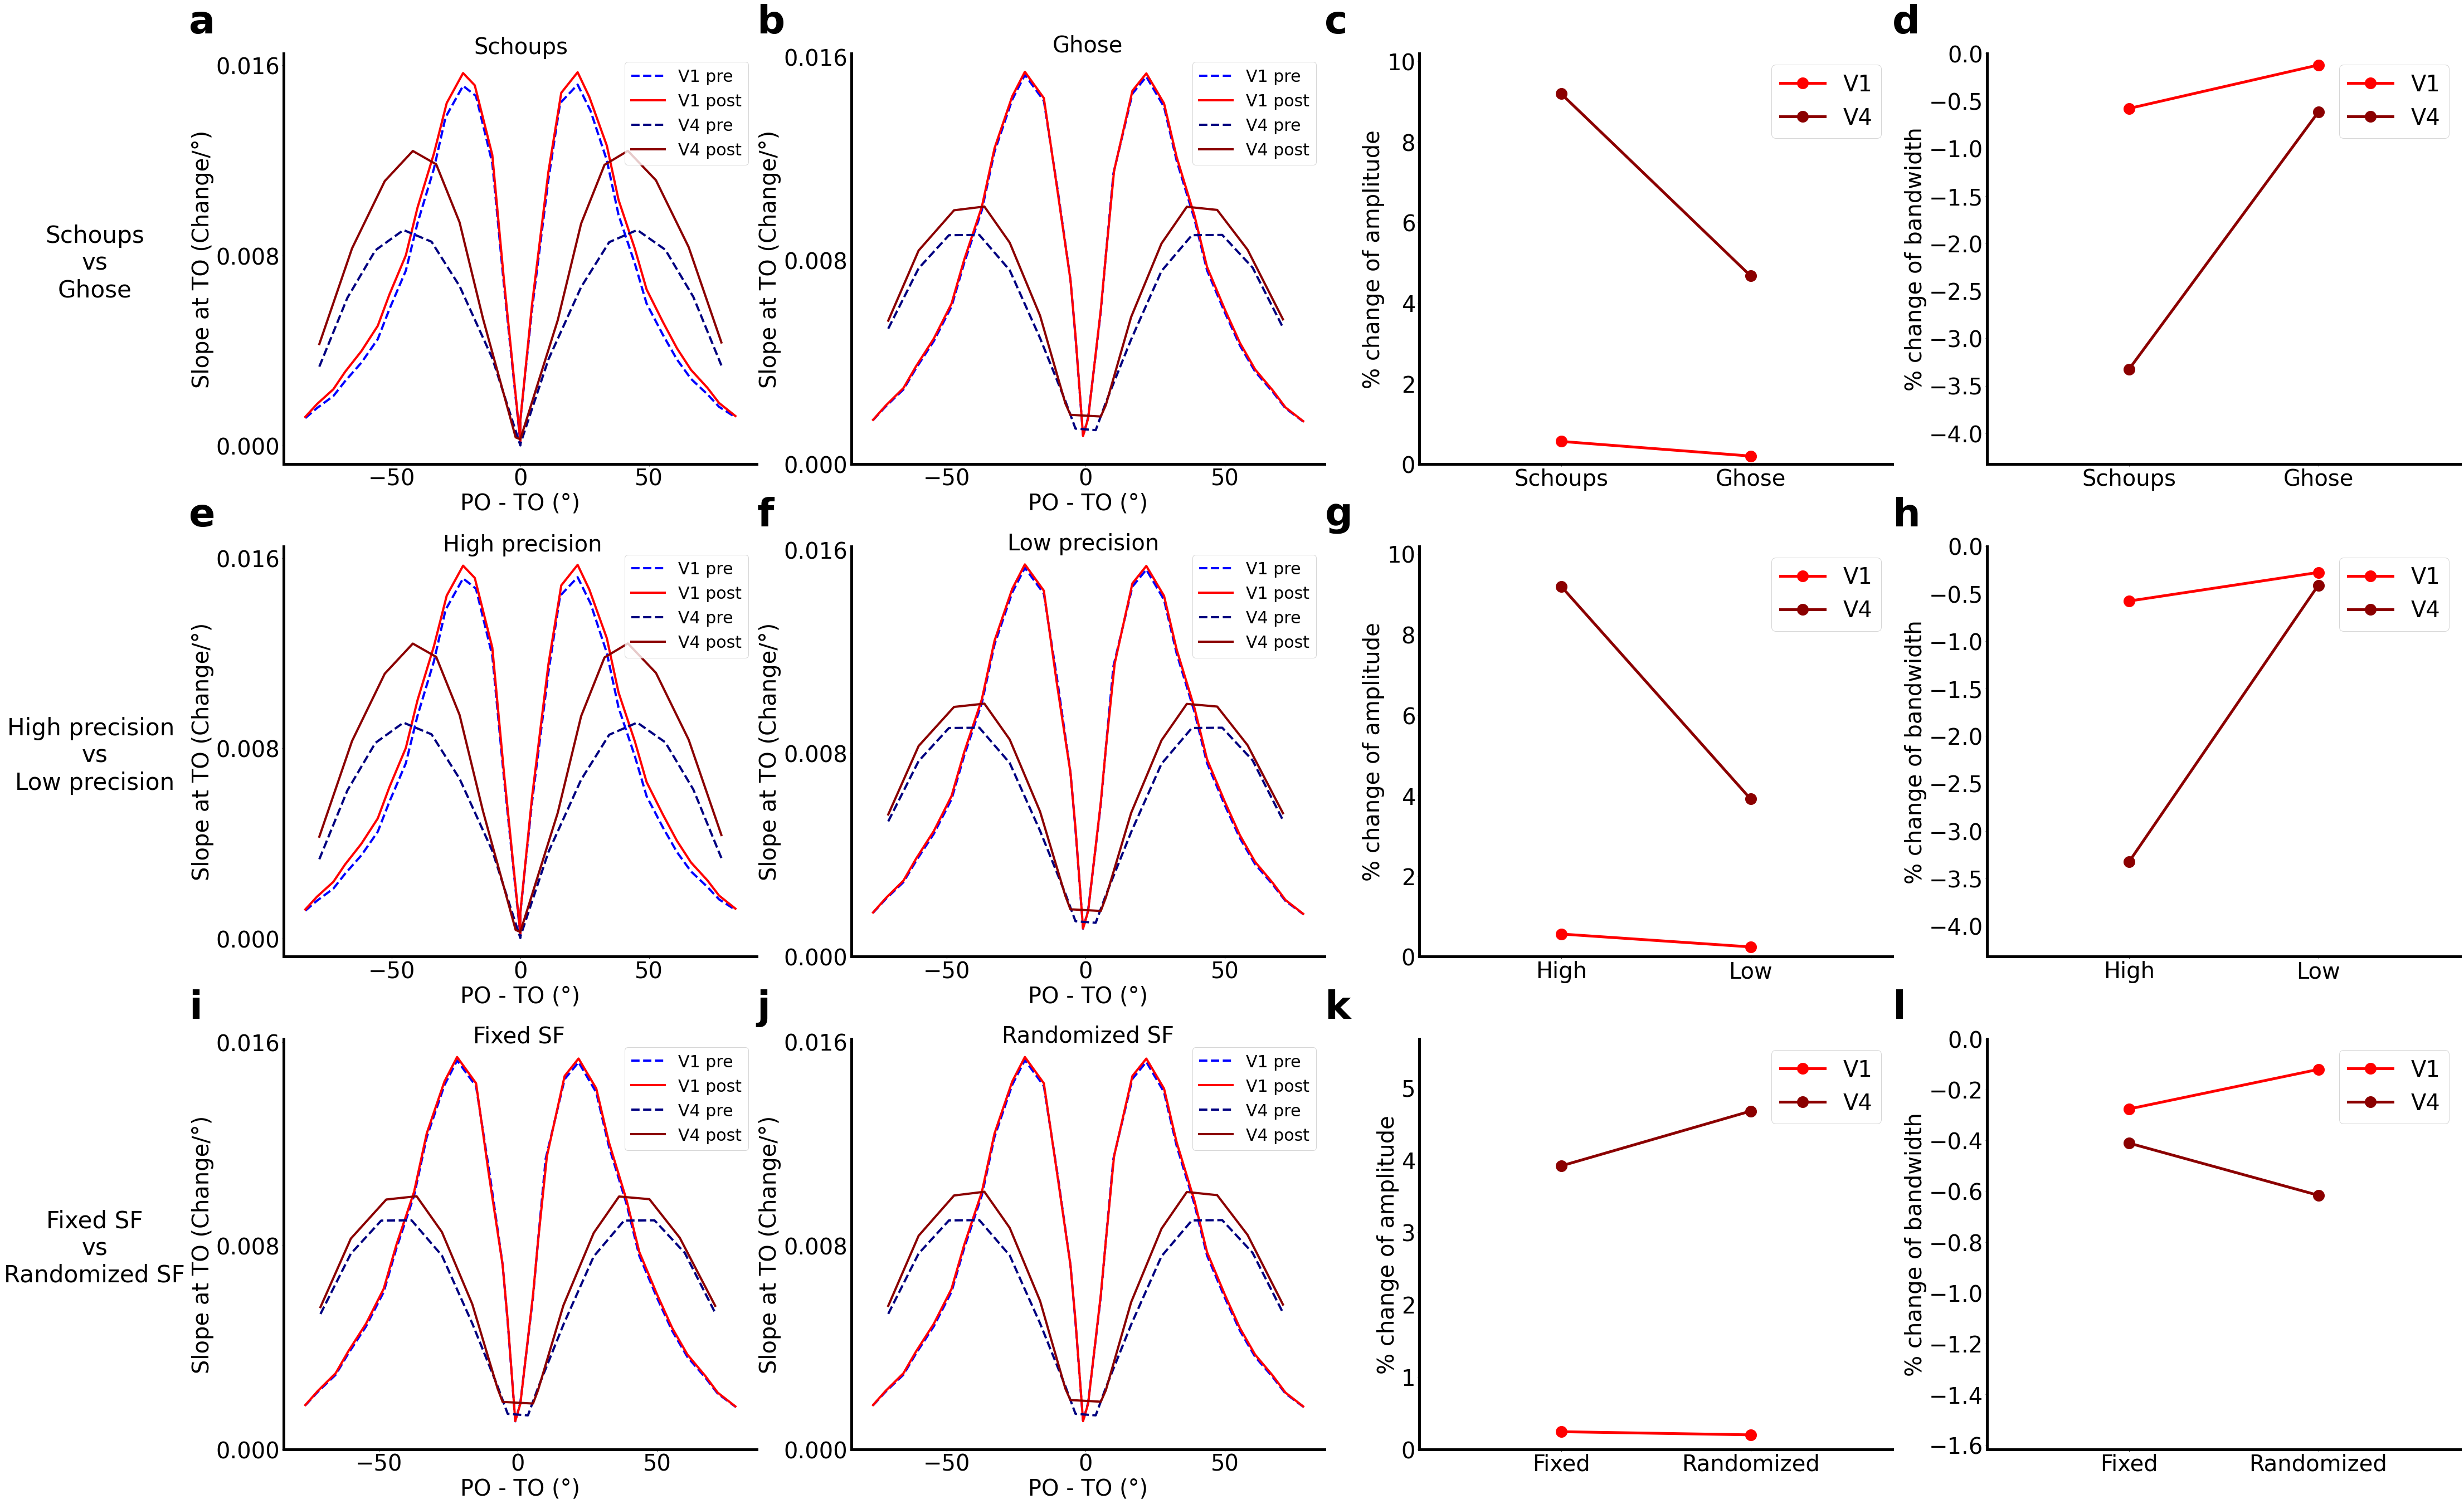

In [26]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25

model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'


fig, axs = plt.subplots(3, 4, figsize = (70, 40))

schoups_savepath = 'trained_models/high_fixed_normalized_long' + model
ghose_savepath = 'trained_models/low_randomized_normalized_long' + model

schoups_v1_before_range = torch.load(schoups_savepath + "v1_before_range.pt")
schoups_v1_after_range = torch.load(schoups_savepath + "v1_after_range.pt")
schoups_v4_before_range = torch.load(schoups_savepath + "v4_before_range.pt")
schoups_v4_after_range = torch.load(schoups_savepath + "v4_after_range.pt")
schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "v1_mean_before_slopes.pt")
schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "v1_mean_after_slopes.pt")
schoups_v4_before_slopes = torch.load(schoups_savepath + "v4_before_slopes.pt")
schoups_v4_after_slopes = torch.load(schoups_savepath + "v4_after_slopes.pt")
axs[0, 0].plot(schoups_v1_before_range, schoups_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[0, 0].plot(schoups_v1_after_range, schoups_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[0, 0].plot(schoups_v4_before_range, schoups_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[0, 0].plot(schoups_v4_after_range, schoups_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[0, 0].text(x = -18, y = 0.0165, s = "Schoups", fontsize = 40)

ghose_v1_before_range = torch.load(ghose_savepath + "v1_before_range.pt")
ghose_v1_after_range = torch.load(ghose_savepath + "v1_after_range.pt")
ghose_v4_before_range = torch.load(ghose_savepath + "v4_before_range.pt")
ghose_v4_after_range = torch.load(ghose_savepath + "v4_after_range.pt")
ghose_v1_mean_before_slopes = torch.load(ghose_savepath + "v1_mean_before_slopes.pt")
ghose_v1_mean_after_slopes = torch.load(ghose_savepath + "v1_mean_after_slopes.pt")
ghose_v4_before_slopes = torch.load(ghose_savepath + "v4_before_slopes.pt")
ghose_v4_after_slopes = torch.load(ghose_savepath + "v4_after_slopes.pt")
axs[0, 1].plot(ghose_v1_before_range, ghose_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[0, 1].plot(ghose_v1_after_range, ghose_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[0, 1].plot(ghose_v4_before_range, ghose_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[0, 1].plot(ghose_v4_after_range, ghose_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[0, 1].text(x = -12, y = 0.0162, s = "Ghose", fontsize = 40)

schoups_v1_amplitude_difference = torch.load(schoups_savepath + "v1_amplitude.pt")
schoups_v4_amplitude_difference = torch.load(schoups_savepath + "v4_amplitude.pt")
ghose_v1_amplitude_difference = torch.load(ghose_savepath + "v1_amplitude.pt")
ghose_v4_amplitude_difference = torch.load(ghose_savepath + "v4_amplitude.pt")
axs[0, 2].plot([3, 7], [schoups_v1_amplitude_difference, ghose_v1_amplitude_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[0, 2].plot([3, 7], [schoups_v4_amplitude_difference, ghose_v4_amplitude_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[0, 2].set_ylim(0, np.max([schoups_v1_amplitude_difference, schoups_v4_amplitude_difference, 
                              ghose_v1_amplitude_difference, ghose_v4_amplitude_difference]) + 1)



schoups_v1_bandwidth_difference = torch.load(schoups_savepath + "v1_bandwidth.pt")
schoups_v4_bandwidth_difference = torch.load(schoups_savepath + "v4_bandwidth.pt")
ghose_v1_bandwidth_difference = torch.load(ghose_savepath + "v1_bandwidth.pt")
ghose_v4_bandwidth_difference = torch.load(ghose_savepath + "v4_bandwidth.pt")
axs[0, 3].plot([3, 7], [schoups_v1_bandwidth_difference, ghose_v1_bandwidth_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[0, 3].plot([3, 7], [schoups_v4_bandwidth_difference, ghose_v4_bandwidth_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[0, 3].set_ylim(np.min([schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference, 
                           ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference]) - 1, 0)





low_savepath = 'trained_models/low_fixed_normalized_long' + model
high_savepath = 'trained_models/high_fixed_normalized_long' + model


high_v1_before_range = torch.load(high_savepath + "v1_before_range.pt")
high_v1_after_range = torch.load(high_savepath + "v1_after_range.pt")
high_v4_before_range = torch.load(high_savepath + "v4_before_range.pt")
high_v4_after_range = torch.load(high_savepath + "v4_after_range.pt")
high_v1_mean_before_slopes = torch.load(high_savepath + "v1_mean_before_slopes.pt")
high_v1_mean_after_slopes = torch.load(high_savepath + "v1_mean_after_slopes.pt")
high_v4_before_slopes = torch.load(high_savepath + "v4_before_slopes.pt")
high_v4_after_slopes = torch.load(high_savepath + "v4_after_slopes.pt")
axs[1, 0].plot(high_v1_before_range, high_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[1, 0].plot(high_v1_after_range, high_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[1, 0].plot(high_v4_before_range, high_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[1, 0].plot(high_v4_after_range, high_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[1, 0].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 20)
axs[1, 0].text(x = -30, y = 0.0163, s = "High precision", fontsize = 40)


low_v1_before_range = torch.load(low_savepath + "v1_before_range.pt")
low_v1_after_range = torch.load(low_savepath + "v1_after_range.pt")
low_v4_before_range = torch.load(low_savepath + "v4_before_range.pt")
low_v4_after_range = torch.load(low_savepath + "v4_after_range.pt")
low_v1_mean_before_slopes = torch.load(low_savepath + "v1_mean_before_slopes.pt")
low_v1_mean_after_slopes = torch.load(low_savepath + "v1_mean_after_slopes.pt")
low_v4_before_slopes = torch.load(low_savepath + "v4_before_slopes.pt")
low_v4_after_slopes = torch.load(low_savepath + "v4_after_slopes.pt")
axs[1, 1].plot(low_v1_before_range, low_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[1, 1].plot(low_v1_after_range, low_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[1, 1].plot(low_v4_before_range, low_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[1, 1].plot(low_v4_after_range, low_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[1, 1].text(x = -28, y = 0.016, s = "Low precision", fontsize = 40)


low_v1_amplitude_difference = torch.load(low_savepath + "v1_amplitude.pt")
low_v4_amplitude_difference = torch.load(low_savepath + "v4_amplitude.pt")
high_v1_amplitude_difference = torch.load(high_savepath + "v1_amplitude.pt")
high_v4_amplitude_difference = torch.load(high_savepath + "v4_amplitude.pt")
axs[1, 2].plot([3, 7], [high_v1_amplitude_difference, low_v1_amplitude_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[1, 2].plot([3, 7], [high_v4_amplitude_difference, low_v4_amplitude_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[1, 2].set_ylim(0, np.max([high_v1_amplitude_difference, high_v4_amplitude_difference, 
                              low_v1_amplitude_difference, low_v4_amplitude_difference]) + 1)




low_v1_bandwidth_difference = torch.load(low_savepath + "v1_bandwidth.pt")
low_v4_bandwidth_difference = torch.load(low_savepath + "v4_bandwidth.pt")
high_v1_bandwidth_difference = torch.load(high_savepath + "v1_bandwidth.pt")
high_v4_bandwidth_difference = torch.load(high_savepath + "v4_bandwidth.pt")
axs[1, 3].plot([3, 7], [high_v1_bandwidth_difference, low_v1_bandwidth_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[1, 3].plot([3, 7], [high_v4_bandwidth_difference, low_v4_bandwidth_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[1, 3].set_ylim(np.min([high_v1_bandwidth_difference, high_v4_bandwidth_difference, 
                           low_v1_bandwidth_difference, low_v4_bandwidth_difference]) - 1, 0)



fixed_savepath = 'trained_models/low_fixed_normalized_long' + model
randomized_savepath = 'trained_models/low_randomized_normalized_long' + model

fixed_v1_before_range = torch.load(fixed_savepath + "v1_before_range.pt")
fixed_v1_after_range = torch.load(fixed_savepath + "v1_after_range.pt")
fixed_v4_before_range = torch.load(fixed_savepath + "v4_before_range.pt")
fixed_v4_after_range = torch.load(fixed_savepath + "v4_after_range.pt")
fixed_v1_mean_before_slopes = torch.load(fixed_savepath + "v1_mean_before_slopes.pt")
fixed_v1_mean_after_slopes = torch.load(fixed_savepath + "v1_mean_after_slopes.pt")
fixed_v4_before_slopes = torch.load(fixed_savepath + "v4_before_slopes.pt")
fixed_v4_after_slopes = torch.load(fixed_savepath + "v4_after_slopes.pt")

axs[2, 0].plot(fixed_v1_before_range, fixed_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[2, 0].plot(fixed_v1_after_range, fixed_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[2, 0].plot(fixed_v4_before_range, fixed_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[2, 0].plot(fixed_v4_after_range, fixed_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[2, 0].text(x = -16, y = 0.016, s = "Fixed SF", fontsize = 40)

randomized_v1_before_range = torch.load(randomized_savepath + "v1_before_range.pt")
randomized_v1_after_range = torch.load(randomized_savepath + "v1_after_range.pt")
randomized_v4_before_range = torch.load(randomized_savepath + "v4_before_range.pt")
randomized_v4_after_range = torch.load(randomized_savepath + "v4_after_range.pt")
randomized_v1_mean_before_slopes = torch.load(randomized_savepath + "v1_mean_before_slopes.pt")
randomized_v1_mean_after_slopes = torch.load(randomized_savepath + "v1_mean_after_slopes.pt")
randomized_v4_before_slopes = torch.load(randomized_savepath + "v4_before_slopes.pt")
randomized_v4_after_slopes = torch.load(randomized_savepath + "v4_after_slopes.pt")
axs[2, 1].plot(randomized_v1_before_range, randomized_v1_mean_before_slopes, color = 'blue', linestyle = 'dashed', linewidth = 4)
axs[2, 1].plot(randomized_v1_after_range, randomized_v1_mean_after_slopes, color = 'red', linewidth = 4)
axs[2, 1].plot(randomized_v4_before_range, randomized_v4_before_slopes, color = 'navy', linestyle = 'dashed', linewidth = 4)
axs[2, 1].plot(randomized_v4_after_range, randomized_v4_after_slopes, color = 'darkred', linewidth = 4)
axs[2, 1].text(x = -30, y = 0.016, s = "Randomized SF", fontsize = 40)

fixed_v1_amplitude_difference = torch.load(fixed_savepath + "v1_amplitude.pt")
fixed_v4_amplitude_difference = torch.load(fixed_savepath + "v4_amplitude.pt")
randomized_v1_amplitude_difference = torch.load(randomized_savepath + "v1_amplitude.pt")
randomized_v4_amplitude_difference = torch.load(randomized_savepath + "v4_amplitude.pt")
axs[2, 2].plot([3, 7], [fixed_v1_amplitude_difference, randomized_v1_amplitude_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[2, 2].plot([3, 7], [fixed_v4_amplitude_difference, randomized_v4_amplitude_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[2, 2].set_ylim(0, np.max([fixed_v1_amplitude_difference, fixed_v4_amplitude_difference, 
                              randomized_v1_amplitude_difference, randomized_v4_amplitude_difference]) + 1)



fixed_v1_bandwidth_difference = torch.load(fixed_savepath + "v1_bandwidth.pt")
fixed_v4_bandwidth_difference = torch.load(fixed_savepath + "v4_bandwidth.pt")
randomized_v1_bandwidth_difference = torch.load(randomized_savepath + "v1_bandwidth.pt")
randomized_v4_bandwidth_difference = torch.load(randomized_savepath + "v4_bandwidth.pt")
axs[2, 3].plot([3, 7], [fixed_v1_bandwidth_difference, randomized_v1_bandwidth_difference], marker = 'o', markersize = 20, color = 'red', linewidth = 5);
axs[2, 3].plot([3, 7], [fixed_v4_bandwidth_difference, randomized_v4_bandwidth_difference], marker = 'o', markersize = 20, color = 'darkred', linewidth = 5);
axs[2, 3].set_ylim(np.min([fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference, 
                           randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference]) - 1, 0)


for i in range(3):  
    for j in range(2, 4):
        axs[i, j].set_xticks([3, 7])
        axs[i, j].legend(["V1", "V4"], fontsize = 40)
        axs[i, j].set_xlim(0, 10)
        axs[i, 2].set_ylabel("% change of amplitude", fontsize = 40);
        axs[i, 3].set_ylabel("% change of bandwidth", fontsize = 40);

for i in range(3):
    for j in range(4):
        axs[i, j].tick_params(axis = 'x', labelsize = 40)
        axs[i, j].tick_params(axis = 'y', labelsize = 40)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['left'].set_linewidth(5)
        axs[i, j].spines['bottom'].set_linewidth(5)
        if j == 0 or j == 1:
            axs[i, j].set_xlabel("PO - TO (°)", fontsize = 40)
            axs[i, j].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 30)
            axs[i, j].set_xticks([-50, 0, 50])
            axs[i, j].set_yticks([0, 0.008, 0.016])
            axs[i, j].set_ylabel("Slope at TO (Change/°)", fontsize = 40)

axs[0, 2].set_xticklabels(["Schoups", "Ghose"])
axs[0, 3].set_xticklabels(["Schoups", "Ghose"])
axs[1, 2].set_xticklabels(["High", "Low"])
axs[1, 3].set_xticklabels(["High", "Low"])
axs[2, 2].set_xticklabels(["Fixed", "Randomized"])
axs[2, 3].set_xticklabels(["Fixed", "Randomized"])
for i in range(3):
    for j in range(2,4):
        axs[i, j].tick_params(axis = 'x', labelsize = 40)
        axs[i, j].tick_params(axis = 'y', labelsize = 40)
        
axs[0, 0].set_title("Schoups\nvs\nGhose", fontsize = 42, x = -0.4, y = 0.4)
axs[1, 0].set_title("High precision \nvs\nLow precision", fontsize = 42, x = -0.4, y = 0.4)
axs[2, 0].set_title("Fixed SF\nvs\nRandomized SF", fontsize = 42, x = -0.4, y = 0.4)
plt.subplots_adjust(bottom = 0.01)

for n, ax in enumerate(axs.flat):
    ax.text(-0.2, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=70, weight='bold')

# plt.tight_layout()
plt.savefig("Fig 3.jpeg", bbox_inches = 'tight')


## Peak point of change

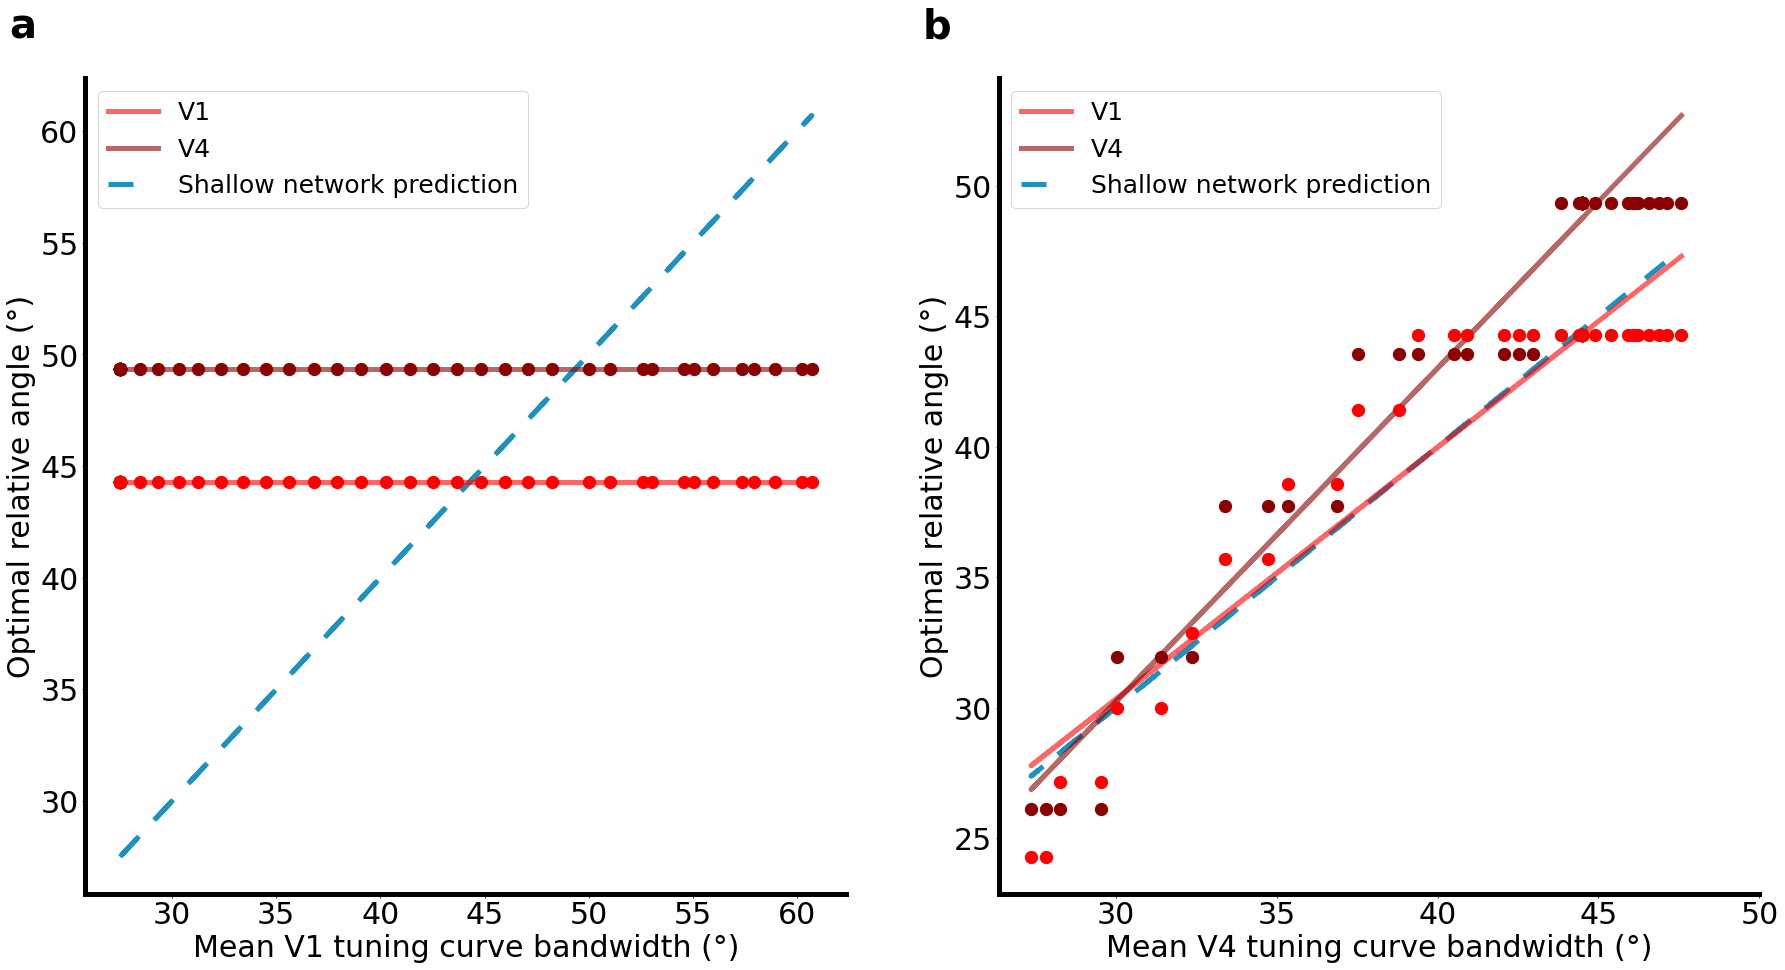

In [27]:
# v1_gammas = [i/10 for i in range(5, 16)]
# v4_orientation_stds = [i/10 for i in range(1, 11)]
v1_gammas = list(np.linspace(0.5, 1.6, 32)) + [0.5] * 32
v4_orientation_stds = [0.7] * 32 + list(np.linspace(0.1, 1, 32))
v1_xs = []
v1_ys = []
v1_v4_ys = []
v4_xs = []
v4_ys = []
v4_v1_ys = []


for i in range(len(v1_gammas)):
    try:
#         v1_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_max_diff_angle.pt'
#         v4_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v4_max_diff_angle.pt'
#         v1_bandwidth_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_bandwidth.pt'

        
        v1_gamma_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_max_diff_angle.pt'
        v4_gamma_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v4_max_diff_angle.pt'
        v1_bandwidth_savepath = 'trained_models/changing_bandwidths_4/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_bandwidth.pt'

        v1_gamma = torch.load(v1_gamma_savepath)
        v4_gamma = torch.load(v4_gamma_savepath)
        v1_bandwidth = torch.load(v1_bandwidth_savepath)

        v1_xs.append(v1_bandwidth)
        v1_ys.append(v1_gamma)
        v1_v4_ys.append(v4_gamma)
    except:
        pass
    
for j in range(len(v4_orientation_stds)):
    try:
        
        v4_orientation_std_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_max_diff_angle.pt'
        v1_orientation_std_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v1_max_diff_angle.pt'
        v4_bandwidth_savepath = 'trained_models/changing_bandwidths_4/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_bandwidth.pt'

        v4_orientation_std = torch.load(v4_orientation_std_savepath)
        v1_orientation_std = torch.load(v1_orientation_std_savepath)
        v4_bandwidth = torch.load(v4_bandwidth_savepath)

        v4_xs.append(v4_bandwidth)
        v4_ys.append(v4_orientation_std)
        v4_v1_ys.append(v1_orientation_std)

    except:
        pass

fig, axs = plt.subplots(1, 2, figsize = (30, 15))


axs[0].scatter(v1_xs, v1_ys, marker = "o", label = "V1", color = 'red', s = 150, zorder = 2)
m1, b1 = np.polyfit(v1_xs, v1_ys, 1)
axs[0].scatter(v1_xs, v1_v4_ys, marker = "o", label = "V4", color = 'darkred', s = 150, zorder = 2)
m2, b2 = np.polyfit(v1_xs, v1_v4_ys, 1)
axs[0].plot(v1_xs, m1*np.array(v1_xs) + b1, color = 'red', linewidth = 5, alpha = 0.6, zorder = 1)
axs[0].plot(v1_xs, m2*np.array(v1_xs) + b2, color = 'darkred', linewidth = 5, alpha = 0.6, zorder = 1)
axs[0].plot(v1_xs, v1_xs, color = '#1d91c0', linestyle = '--', dashes = (5, 5), linewidth = 5, zorder = 0)
axs[0].set_xlabel("Mean V1 tuning curve bandwidth (°)", fontsize = 30)
# axs[0].set_title("Effect of changing V1/V4 tuning curve bandwidth on optimal relative angle", x = 1, y = 1.05, fontsize = 30)

axs[1].scatter(v4_xs, v4_v1_ys, marker = "o", label = "V1", color = 'r', s = 150, zorder = 2)
m3, b3 = np.polyfit(v4_xs, v4_v1_ys, 1)
axs[1].scatter(v4_xs, v4_ys, marker = "o", label = "V4", color = 'darkred', s = 150, zorder = 2)
m4, b4 = np.polyfit(v4_xs, v4_ys, 1)
axs[1].plot(v4_xs, m3*np.array(v4_xs) + b3, color = 'red', linewidth = 5, alpha = 0.6, zorder = 1)
axs[1].plot(v4_xs, m4*np.array(v4_xs) + b4, color = 'darkred', linewidth = 5, alpha = 0.6, zorder = 1)
axs[1].plot(v4_xs, v4_xs, color = '#1d91c0', linestyle = '--', dashes = (5, 5), linewidth = 5, zorder = 0)
axs[1].set_xticks([30, 35, 40, 45, 50])
axs[1].set_xlabel("Mean V4 tuning curve bandwidth (°)", fontsize = 30)



for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_linewidth(5)
    axs[i].spines['bottom'].set_linewidth(5)
    axs[i].legend(["V1", "V4", "Shallow network prediction"], fontsize = 25);
    axs[i].set_ylabel("Optimal relative angle (°)", fontsize = 30)
    axs[i].tick_params(axis = 'x', labelsize = 30)
    axs[i].tick_params(axis = 'y', labelsize = 30)

for n, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=40, weight='bold')


x = []
y = []
for i in range(len(v1_xs)):
    if v1_xs[i] not in x:
        x.append(v1_xs[i])
        y.append(v1_v4_ys[i])
r = np.corrcoef(x, y)
              

plt.savefig("Fig 4.jpeg", bbox_inches = 'tight')

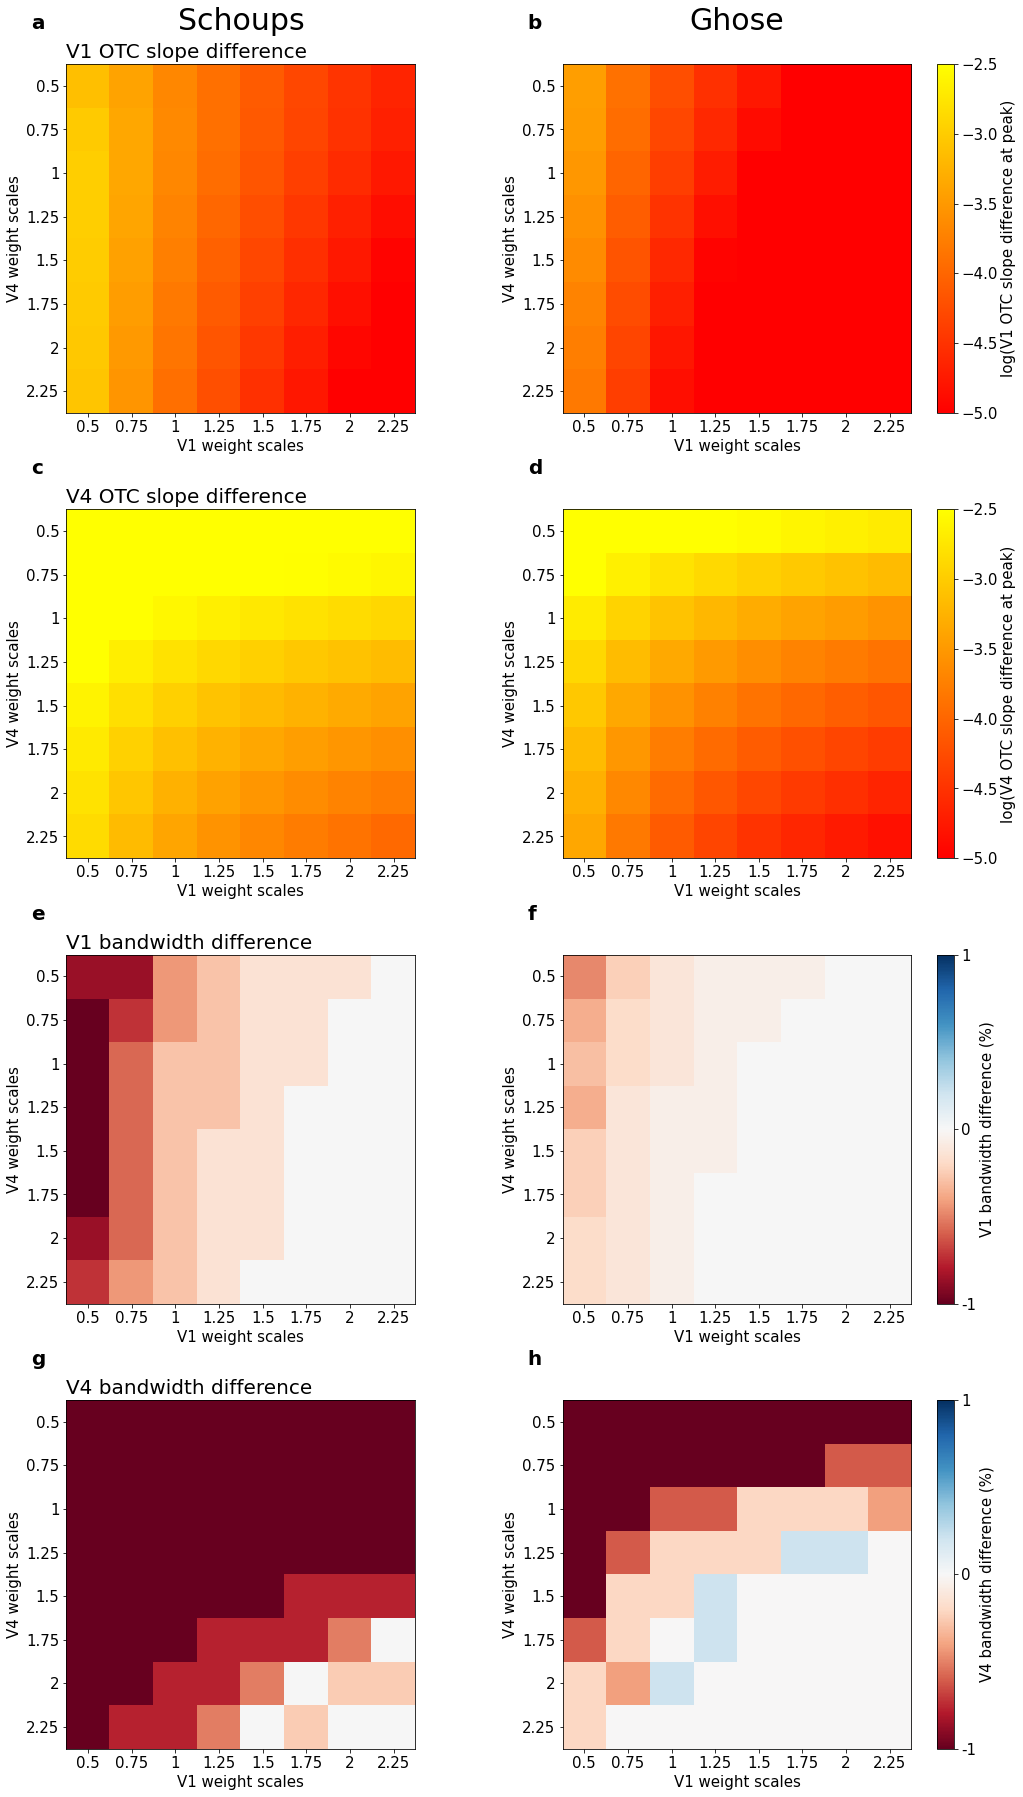

In [32]:
# scales = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
phase = 0.01
scales = [0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25]
# scales = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25]
schoups_v1_grid = torch.zeros(len(scales), len(scales))
schoups_v4_grid = torch.zeros(len(scales), len(scales))
ghose_v1_grid = torch.zeros(len(scales), len(scales))
ghose_v4_grid = torch.zeros(len(scales), len(scales))
schoups_v1_bw_grid = torch.zeros(len(scales), len(scales))
schoups_v4_bw_grid = torch.zeros(len(scales), len(scales))
ghose_v1_bw_grid = torch.zeros(len(scales), len(scales))
ghose_v4_bw_grid = torch.zeros(len(scales), len(scales))
fitness_grid = torch.zeros(len(scales), len(scales))

for j in range(len(scales)):
    for i in range(len(scales)):
        try:
            schoups_v1_max_diff = torch.load('trained_models/high_fixed_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v1_max_diff.pt')
            schoups_v4_max_diff = torch.load('trained_models/high_fixed_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v4_max_diff.pt')
            schoups_v1_grid[i][j] = np.log10(schoups_v1_max_diff)
            schoups_v4_grid[i][j] = np.log10(schoups_v4_max_diff)
#             print(schoups_v1_max_diff, np.log(schoups_v1_max_diff))
            ghose_v1_max_diff = torch.load('trained_models/low_randomized_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v1_max_diff.pt')
            ghose_v4_max_diff = torch.load('trained_models/low_randomized_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v4_max_diff.pt')
            ghose_v1_grid[i][j] = np.log10(ghose_v1_max_diff)
            ghose_v4_grid[i][j] = np.log10(ghose_v4_max_diff)

            schoups_v1_bw = torch.load('trained_models/high_fixed_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v1_bandwidth.pt')
            schoups_v4_bw = torch.load('trained_models/high_fixed_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v4_bandwidth.pt')    
            schoups_v1_bw_grid[i][j] = schoups_v1_bw
            schoups_v4_bw_grid[i][j] = schoups_v4_bw
            

            ghose_v1_bw = torch.load('trained_models/low_randomized_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v1_bandwidth.pt')
            ghose_v4_bw = torch.load('trained_models/low_randomized_normalized_long/weight_scale_' + str(scales[j]).replace('.', '') + '_' + str(phase).replace('.', '') + '_' + str(scales[i]).replace('.', '') + '/v4_bandwidth.pt')    
            ghose_v1_bw_grid[i][j] = ghose_v1_bw
            ghose_v4_bw_grid[i][j] = ghose_v4_bw
            
            if np.abs(schoups_v1_bw) > np.abs(ghose_v1_bw) and schoups_v1_max_diff > ghose_v1_max_diff and np.abs(schoups_v4_bw) < np.abs(ghose_v4_bw):
                fitness_grid[i][j] = 1
        except:
            pass
            
otc_vmin = -5
otc_vmax = -2.5
bw_vmin = -1
bw_vmax = 1

fig, axs = plt.subplots(4, 2, figsize = (15, 25))
axs[0, 0].imshow(schoups_v1_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax)
axs[0, 0].set_title("Schoups", y = 1.08, fontsize = 30)
axs[0, 0].set_title("V1 OTC slope difference", loc = 'left', fontsize = 20)

axs[0, 1].imshow(ghose_v1_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax)
axs[0, 1].set_title("Ghose", y = 1.08, fontsize = 30)
cbar = plt.colorbar(plt.imshow(ghose_v1_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax), ax = axs[0, 1])
cbar.set_label(label = "log(V1 OTC slope difference at peak)", size = 15)
cbar.ax.tick_params(labelsize=15)

axs[1, 0].imshow(schoups_v4_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax)
axs[1, 0].set_title("V4 OTC slope difference", loc = 'left', fontsize = 20)

axs[1, 1].imshow(ghose_v4_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax)

cbar = plt.colorbar(plt.imshow(ghose_v4_grid, cmap = 'autumn', vmin = otc_vmin, vmax = otc_vmax), ax = axs[1, 1])
cbar.set_label(label = "log(V4 OTC slope difference at peak)", size = 15)
cbar.ax.tick_params(labelsize=15)

axs[2, 0].imshow(schoups_v1_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax)

axs[2, 0].set_title("V1 bandwidth difference", loc = 'left', fontsize = 20)

axs[2, 1].imshow(ghose_v1_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax)

cbar = plt.colorbar(plt.imshow(ghose_v1_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax), ax = axs[2, 1])
cbar.set_label(label = 'V1 bandwidth difference (%)', size = 15)
cbar.ax.tick_params(labelsize=15)
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels([-1, 0, 1])

axs[3, 0].imshow(schoups_v4_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax)

axs[3, 0].set_title("V4 bandwidth difference", loc = 'left', fontsize = 20)

axs[3, 1].imshow(ghose_v4_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax)

cbar = plt.colorbar(plt.imshow(ghose_v4_bw_grid, cmap = 'RdBu', vmin = bw_vmin, vmax = bw_vmax), ax = axs[3, 1])
cbar.set_label(label = 'V4 bandwidth difference (%)', size = 15)
cbar.ax.tick_params(labelsize=15)
cbar.set_ticks([-1, 0, 1])
cbar.set_ticklabels([-1, 0, 1])

for i in range(4):
    for j in range(2):
        axs[i, j].tick_params(axis = 'x', labelsize = 15)
        axs[i, j].tick_params(axis = 'y', labelsize = 15)
        axs[i, j].set_xticks(ticks = np.arange(0, 8))
        axs[i, j].set_xticklabels(labels = scales)
        axs[i, j].set_yticks(ticks = np.arange(0, 8))
        axs[i, j].set_yticklabels(labels = scales)
        axs[i, j].set_xlabel("V1 weight scales", fontsize = 15)
        axs[i, j].set_ylabel("V4 weight scales", fontsize = 15)

for n, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.1, string.ascii_lowercase[n], transform=ax.transAxes, size=20, weight='bold')
plt.tight_layout()
plt.savefig("Supplementary fig 1.jpeg", bbox_inches = 'tight')



/tmp/57117577.1.short.qc/ipykernel_202856/1007931860.py:15: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(range(50000))


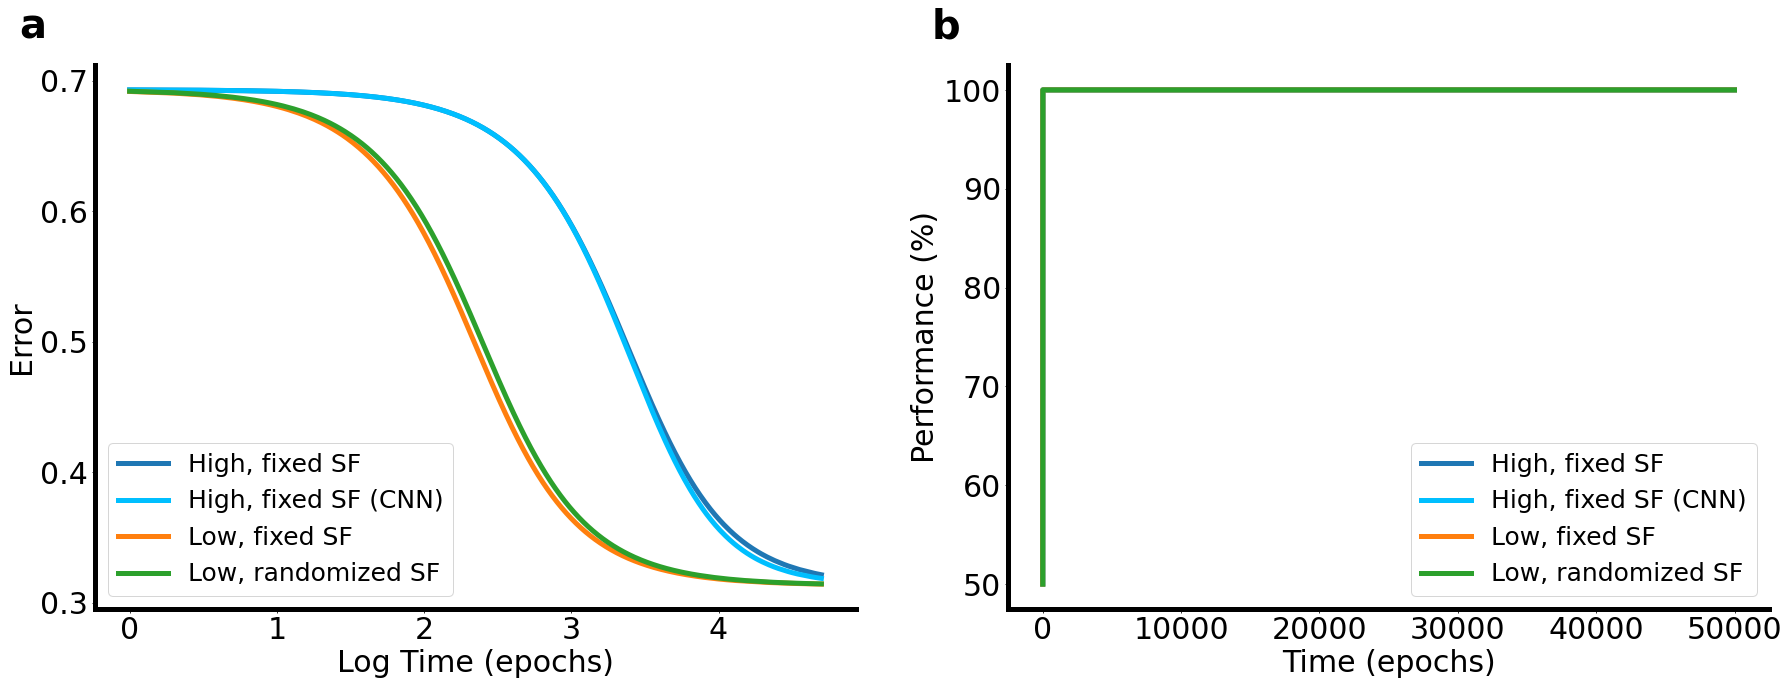

In [19]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 2
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'
schoups_error = torch.load(savepath + 'high_fixed_normalized_long' + model + 'loss.pt')
schoups_performance = torch.load(savepath + 'high_fixed_normalized_long' + model + 'performance.pt')
ghose_error = torch.load(savepath + 'low_randomized_normalized_long' + model + 'loss.pt')
ghose_performance = torch.load(savepath + 'low_randomized_normalized_long' + model + 'performance.pt')
low_error = torch.load(savepath + 'low_fixed_normalized_long' + model + 'loss.pt')
low_performance = torch.load(savepath + 'low_fixed_normalized_long' + model + 'performance.pt')
conv_error = torch.load(savepath + 'conv_high_fixed_normalized' + model + 'loss.pt')
conv_performance = torch.load(savepath + 'conv_high_fixed_normalized' + model + 'performance.pt')

x = np.log10(range(50000))

fig, axs = plt.subplots(1, 2, figsize = (30, 10))
axs[0].plot(x, schoups_error, linewidth = 5)
axs[0].plot(x, conv_error, linewidth = 5, color = "deepskyblue")
axs[0].plot(x, low_error, linewidth = 5)
axs[0].plot(x, ghose_error, linewidth = 5)
axs[0].set_xlabel("Log Time (epochs)", fontsize = 30)
axs[0].set_ylabel("Error", fontsize = 30)
axs[0].set_yticks([0.3, 0.4, 0.5, 0.6, 0.7])
axs[0].set_yticklabels([0.3, 0.4, 0.5, 0.6, 0.7])

axs[1].plot(range(50000), schoups_performance, linewidth = 5)
axs[1].plot(range(50000), conv_performance, linewidth = 5, color = "deepskyblue")
axs[1].plot(range(50000), low_performance, linewidth = 5)
axs[1].plot(range(50000), ghose_performance, linewidth = 5)

axs[1].set_xlabel("Time (epochs)", fontsize = 30)
axs[1].set_ylabel("Performance (%)", fontsize = 30)

    
for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_linewidth(5)
    axs[i].spines['bottom'].set_linewidth(5)
    axs[i].tick_params(axis = 'x', labelsize = 30)
    axs[i].tick_params(axis = 'y', labelsize = 30)
    axs[i].legend(["High, fixed SF", "High, fixed SF (CNN)", "Low, fixed SF", "Low, randomized SF"], fontsize = 25);
    
for n, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=40, weight='bold')
    
plt.savefig("Supplementary fig 2.jpeg", bbox_inches = 'tight')

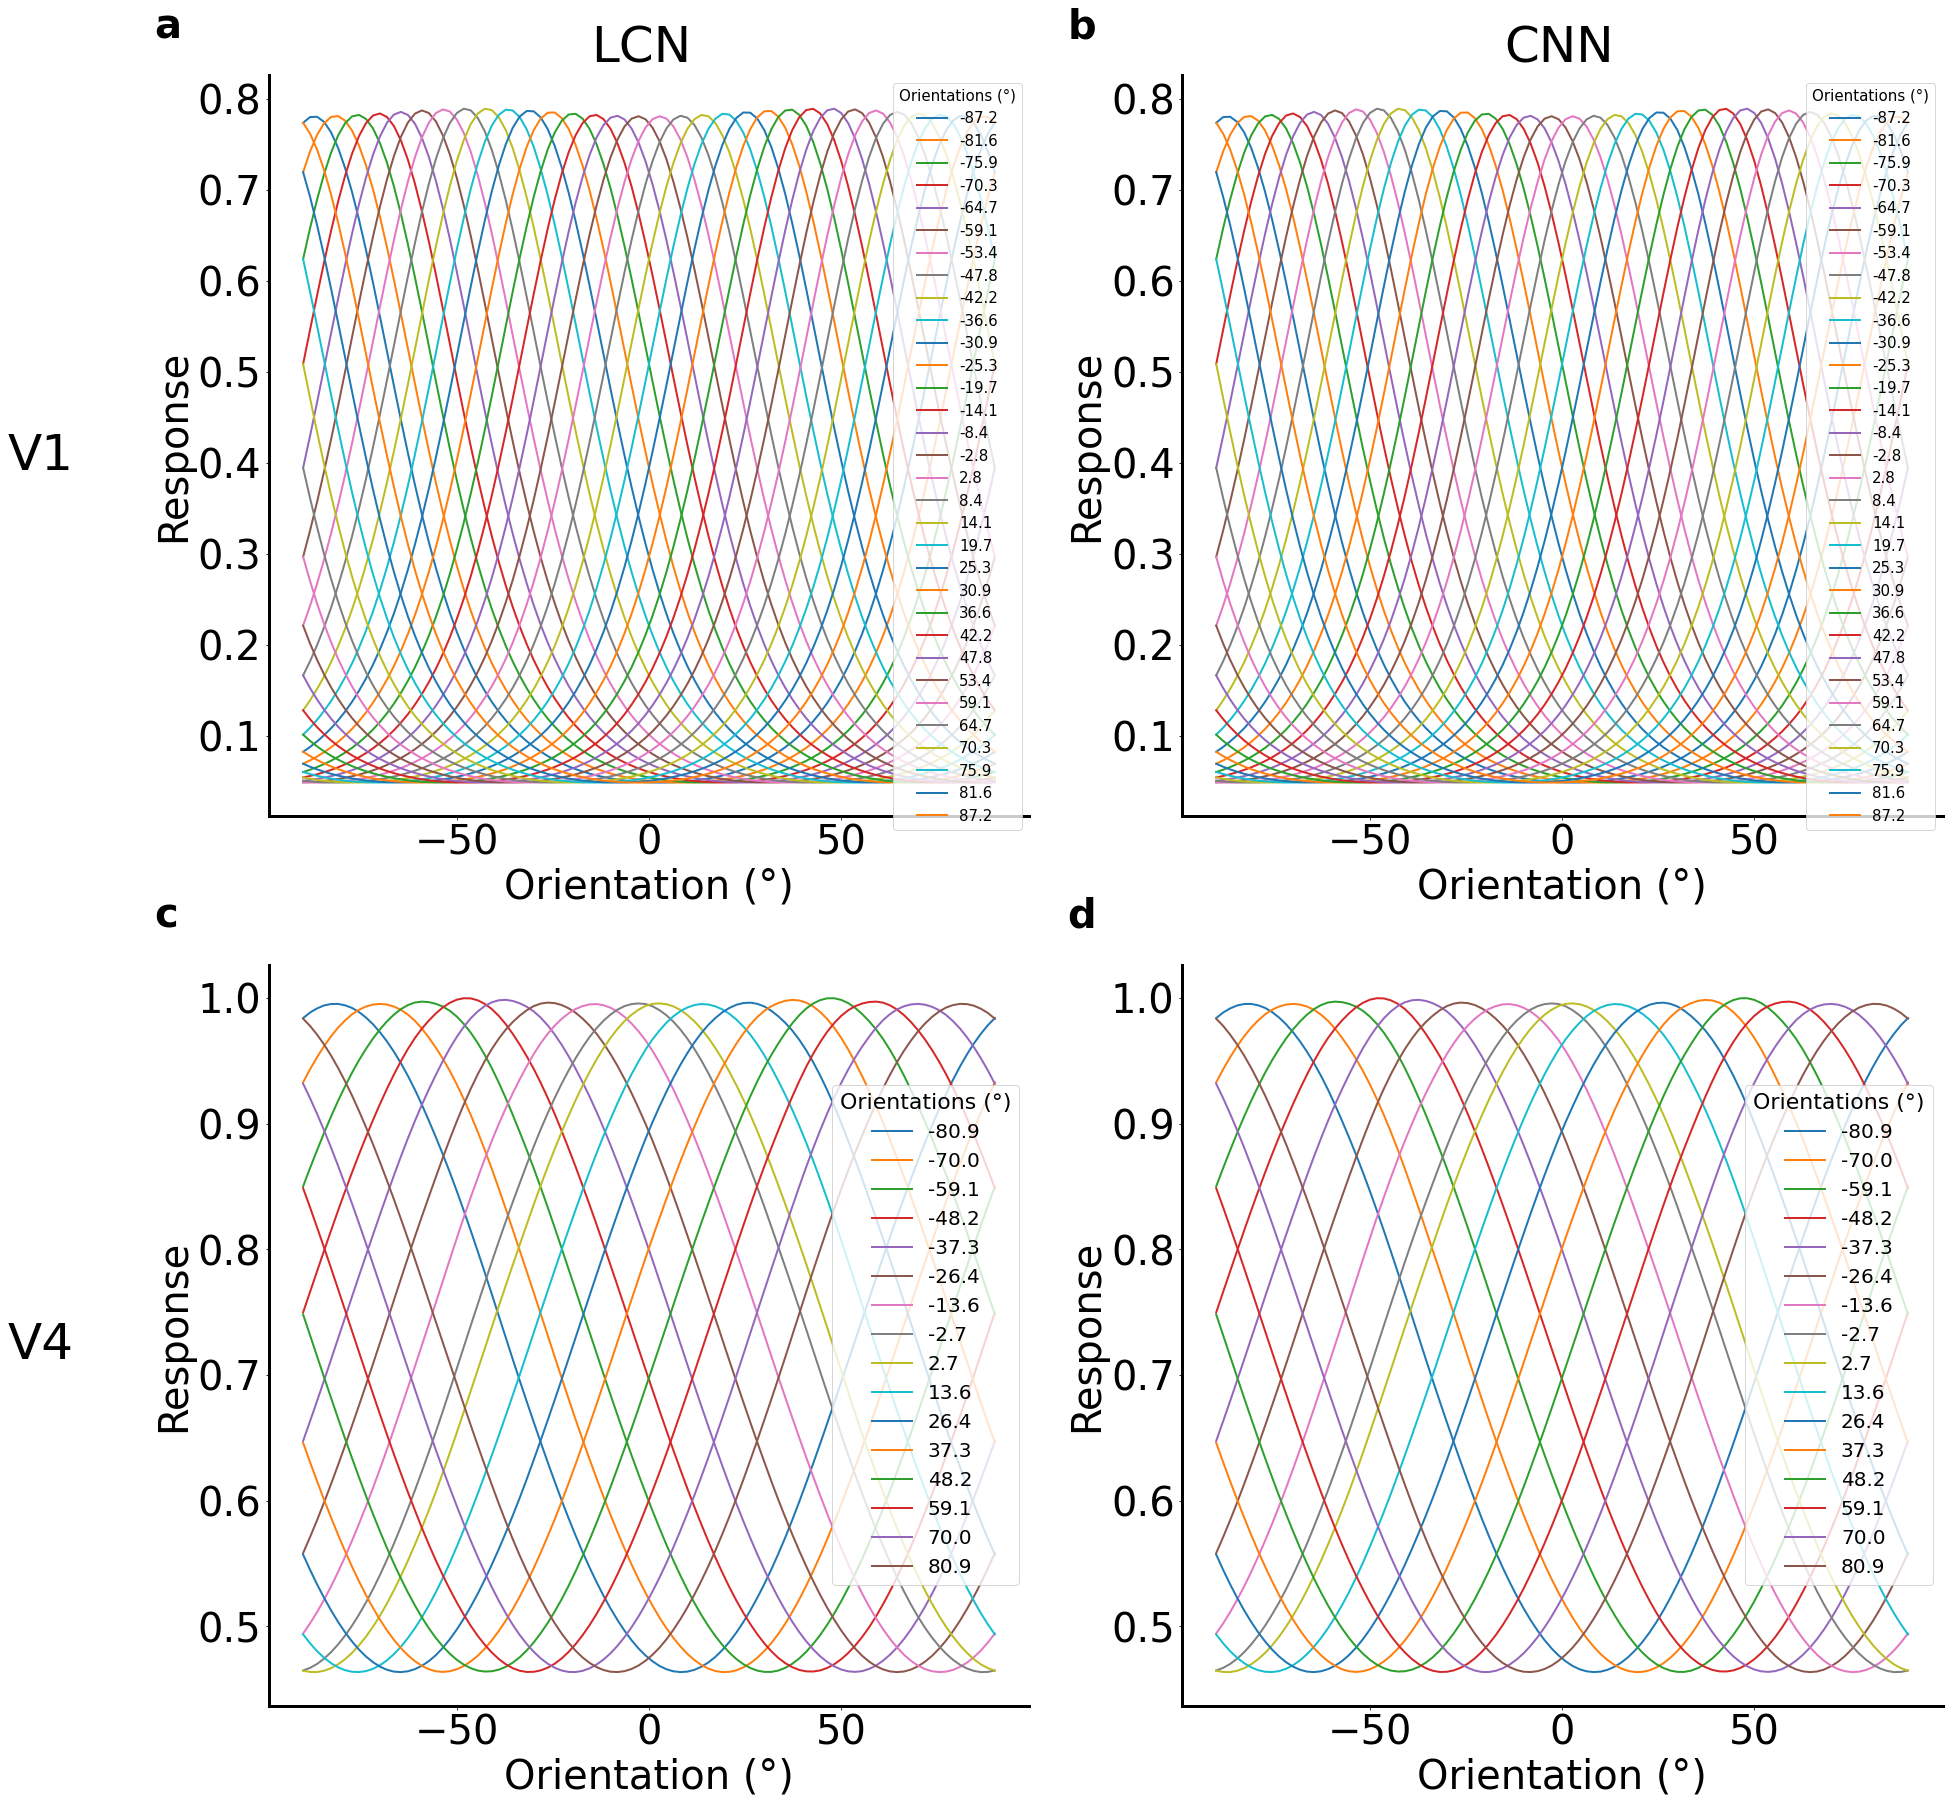

In [34]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'

x = np.linspace(-np.pi/2, np.pi/2, 100)
x = (x * 180) / np.pi
v1_angles = np.linspace(-np.pi/2 + np.pi/(2 * 32), np.pi/2 - np.pi/(2 * 32), 32)

fig, axs = plt.subplots(2, 2, figsize = (30, 30))
schoups_after_v1_tuning_curve = torch.load(savepath + "high_fixed_normalized_long" + model + "V1_after_tuning_curve.pt")
schoups_before_v1_tuning_curve = torch.load(savepath + "high_fixed_normalized_long" + model + "V1_before_tuning_curve.pt")
schoups_after_v4_tuning_curve = torch.load(savepath + "high_fixed_normalized_long" + model + "V4_after_tuning_curve.pt")
schoups_before_v4_tuning_curve = torch.load(savepath + "high_fixed_normalized_long" + model + "V4_before_tuning_curve.pt")

conv_after_v1_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V1_after_tuning_curve.pt")
conv_before_v1_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V1_before_tuning_curve.pt")
conv_after_v4_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V4_after_tuning_curve.pt")
conv_before_v4_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V4_before_tuning_curve.pt")

for i in range(32):
    axs[0, 0].plot(x, schoups_before_v1_tuning_curve[i, 0, 0, 11, 11, :], linewidth = 2)
    axs[0, 1].plot(x, conv_before_v1_tuning_curve[i, 0, 0, :], linewidth = 2)


    
for i in range(16):
    axs[1, 0].plot(x, schoups_before_v4_tuning_curve[i, 1, 1, :], linewidth = 2)
    axs[1, 1].plot(x, conv_before_v4_tuning_curve[i, :], linewidth = 2)

axs[0, 0].text(x = -15, y = 0.84, s = "LCN", fontsize = 50)
axs[0, 1].text(x = -15, y = 0.84, s = "CNN", fontsize = 50)
axs[0, 0].set_title("V1", fontsize = 50, x = -0.3, y = 0.46)
axs[1, 0].set_title("V4", fontsize = 50, x = -0.3, y =0.46) 
axs[1, 0].legend([round(x[schoups_before_v4_tuning_curve[i][1][1][:].argmax()], 1) for i in range(16)], fontsize = 20, loc = 'right').set_title("Orientations (°)", prop = {"size": 22})
axs[1, 1].legend([round(x[conv_before_v4_tuning_curve[i][:].argmax()], 1) for i in range(16)], fontsize = 20, loc = 'right').set_title("Orientations (°)", prop = {"size": 22})

for i in range(2):
    for j in range(2):
        axs[i, j].set_ylabel("Response", fontsize = 40)
        axs[i, j].set_xlabel("Orientation (°)", fontsize = 40)
        leg = axs[0, j].legend([round(v1_angles[i] * 180 / np.pi, 1) for i in range(32)], fontsize = 15)
        leg.set_title("Orientations (°)", prop = {"size": 15})
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['left'].set_linewidth(3)
        axs[i, j].spines['bottom'].set_linewidth(3)
        axs[i, j].tick_params(axis = 'x', labelsize = 40)
        axs[i, j].tick_params(axis = 'y', labelsize = 40)
        
for n, ax in enumerate(axs.flat):
    ax.text(-0.15, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=40, weight='bold')

plt.savefig("Supplementary fig 3.jpeg", bbox_inches = 'tight')

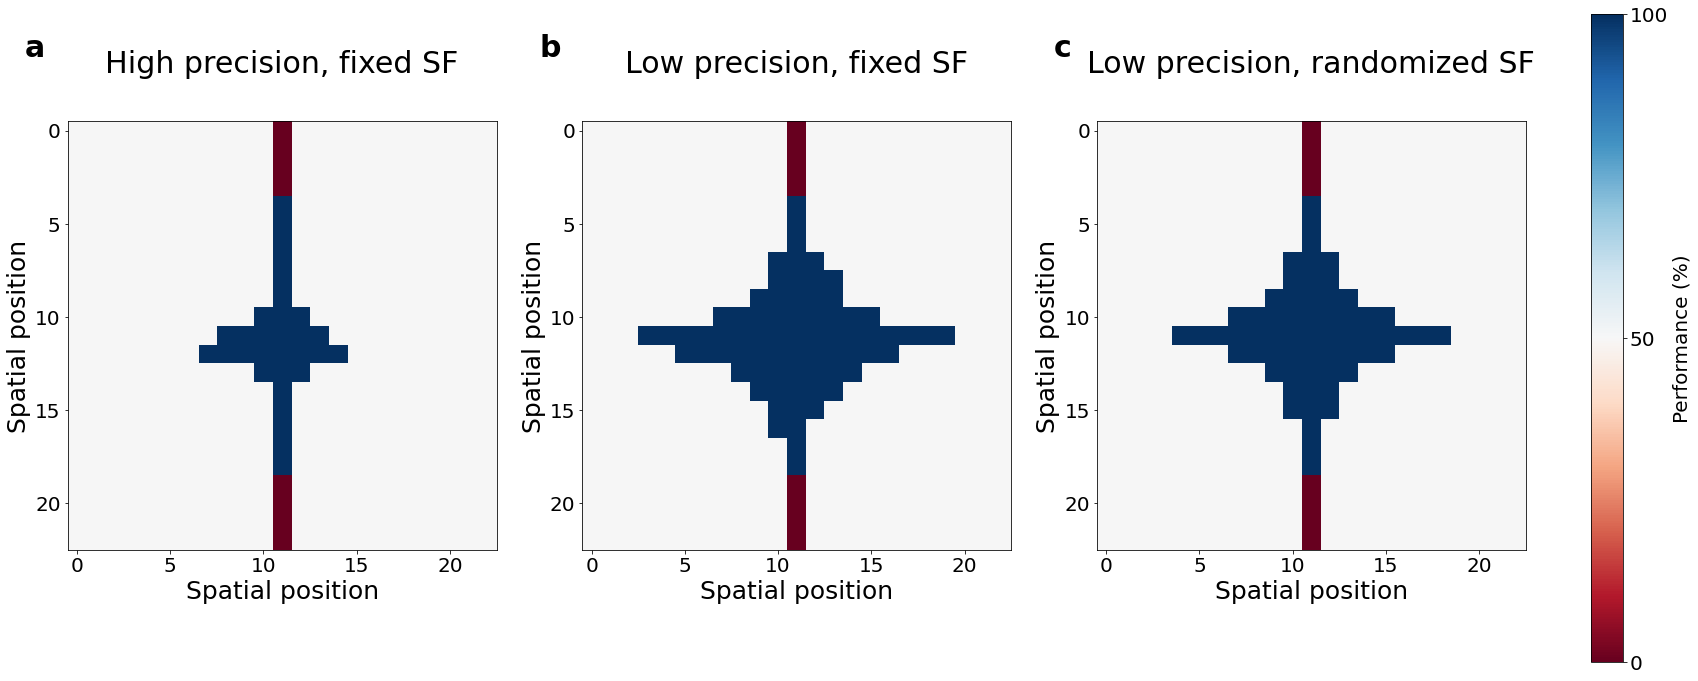

In [21]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'

fig, axs = plt.subplots(1, 3, figsize = (30, 15));
schoups_transfer = torch.load(savepath + "high_fixed_normalized_long" + model + "transfer_performance.pt")
axs[0].imshow(schoups_transfer, cmap = 'RdBu', vmin = 0, vmax = 100);
axs[0].set_title("High precision, fixed SF", y = 1.1, fontsize = 30);

low_transfer = torch.load(savepath + "low_fixed_normalized_long" + model + "transfer_performance.pt")
axs[1].imshow(low_transfer, cmap = 'RdBu', vmin = 0, vmax = 100);
axs[1].set_title("Low precision, fixed SF", y = 1.1, fontsize = 30);


ghose_transfer = torch.load(savepath + "low_randomized_normalized_long" + model + "transfer_performance.pt")
axs[2].imshow(ghose_transfer, cmap = 'RdBu', vmin = 0, vmax = 100);
axs[2].set_title("Low precision, randomized SF", y = 1.1, fontsize = 30);


    
for i in range(3):
    axs[i].set_xlabel("Spatial position", fontsize = 25);
    axs[i].set_ylabel("Spatial position", fontsize = 25);
    axs[i].tick_params(axis = 'x', labelsize = 20)
    axs[i].tick_params(axis = 'y', labelsize = 20)
    
fig.subplots_adjust(right=0.8);
cbar_ax = fig.add_axes([0.83, 0.2, 0.015, 0.6]);
cbar = fig.colorbar(axs[2].imshow(ghose_transfer, cmap = 'RdBu', vmin = 0, vmax = 100), cax=cbar_ax)
cbar.set_label(label = 'Performance (%)', size = 20);
cbar.ax.tick_params(labelsize=20)
cbar.set_ticks([0, 50, 100])
cbar.set_ticklabels([0, 50, 100])    
# plt.colorbar(axs[2].imshow(ghose_transfer, cmap = 'PiYG', vmin = 0, vmax = 100), fraction = 0.05, pad = 0.06).set_label(label = 'Performance (%)', size = 20)
# plt.tight_layout()
for n, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.15, string.ascii_lowercase[n], transform=ax.transAxes, size=30, weight='bold')

plt.savefig("Supplementary fig 5.jpeg", bbox_inches = 'tight');


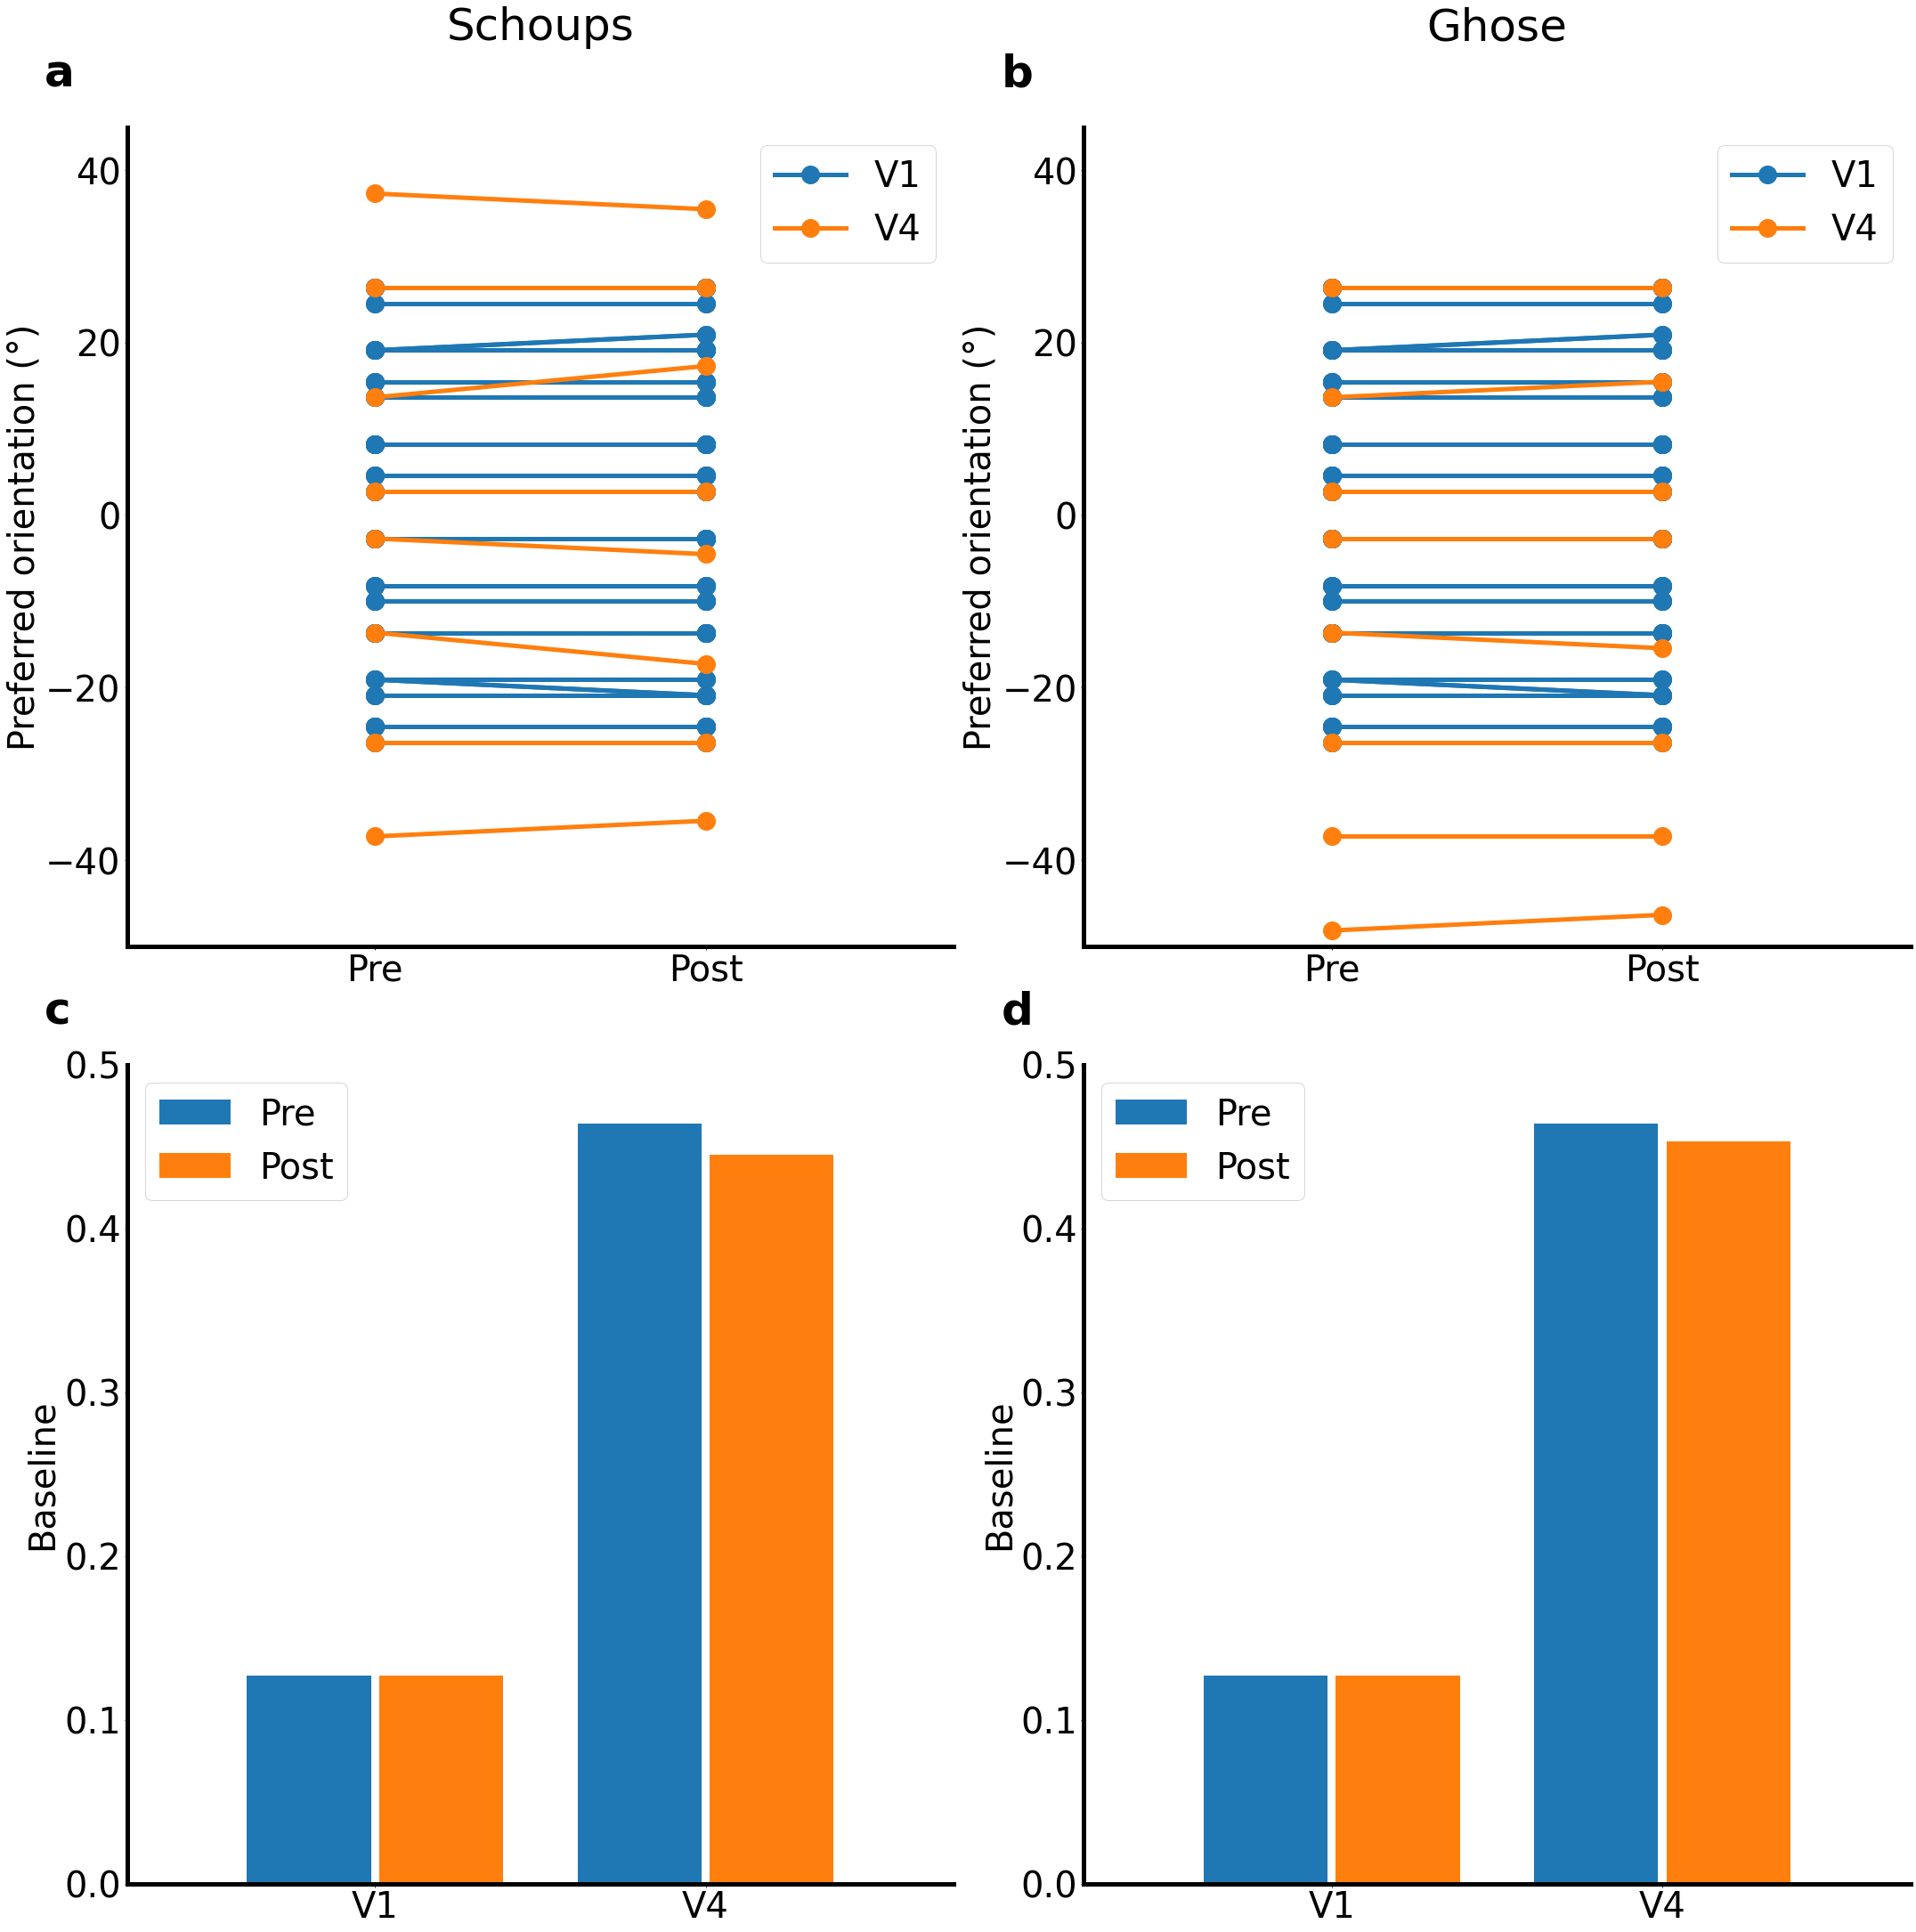

In [42]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'

schoups_v1_before_baseline = torch.load(savepath + "high_fixed_normalized_long" + model + "v1_before_baseline.pt")
schoups_v1_after_baseline = torch.load(savepath + "high_fixed_normalized_long" + model + "v1_after_baseline.pt")
schoups_v4_before_baseline = torch.load(savepath + "high_fixed_normalized_long" + model + "v4_before_baseline.pt")
schoups_v4_after_baseline = torch.load(savepath + "high_fixed_normalized_long" + model + "v4_after_baseline.pt")

ghose_v1_before_baseline = torch.load(savepath + "low_randomized_normalized_long" + model + "v1_before_baseline.pt")
ghose_v1_after_baseline = torch.load(savepath + "low_randomized_normalized_long" + model + "v1_after_baseline.pt")
ghose_v4_before_baseline = torch.load(savepath + "low_randomized_normalized_long" + model + "v4_before_baseline.pt")
ghose_v4_after_baseline = torch.load(savepath + "low_randomized_normalized_long" + model + "v4_after_baseline.pt")

schoups_v1_before_pos = torch.load(savepath + "high_fixed_normalized_long" + model + "v1_before_pos.pt")
schoups_v1_after_pos = torch.load(savepath + "high_fixed_normalized_long" + model + "v1_after_pos.pt")
schoups_v4_before_pos = torch.load(savepath + "high_fixed_normalized_long" + model + "v4_before_pos.pt")
schoups_v4_after_pos = torch.load(savepath + "high_fixed_normalized_long" + model + "v4_after_pos.pt")

ghose_v1_before_pos = torch.load(savepath + "low_randomized_normalized_long" + model + "v1_before_pos.pt")
ghose_v1_after_pos = torch.load(savepath + "low_randomized_normalized_long" + model + "v1_after_pos.pt")
ghose_v4_before_pos = torch.load(savepath + "low_randomized_normalized_long" + model + "v4_before_pos.pt")
ghose_v4_after_pos = torch.load(savepath + "low_randomized_normalized_long" + model + "v4_after_pos.pt")

xlim = 10
x1 = 3
x2 = 7
d = 0.8
width = 1.5

fig, axs = plt.subplots(2, 2, figsize = (30, 30));
for i in range(len(schoups_v1_before_pos)):
    axs[0, 0].plot([x1, x2], [schoups_v1_before_pos[i], schoups_v1_after_pos[i]], color = "tab:blue", linewidth = 5, marker = 'o', markersize = 20)
for j in range(len(schoups_v4_before_pos)):
    axs[0, 0].plot([x1, x2], [schoups_v4_before_pos[j], schoups_v4_after_pos[j]], color = "tab:orange", linewidth = 5, marker = 'o', markersize = 20)
axs[0, 0].set_title("Schoups", y = 1.1, fontsize = 50)
for i in range(len(schoups_v1_before_pos)):
    a, = axs[0, 1].plot([x1, x2], [schoups_v1_before_pos[i], schoups_v1_after_pos[i]], color = "tab:blue", linewidth = 5, marker = 'o', markersize = 20);
for j in range(len(schoups_v4_before_pos)):
    b, = axs[0, 1].plot([x1, x2], [ghose_v4_before_pos[j], ghose_v4_after_pos[j]], color = "tab:orange", linewidth = 5, marker = 'o', markersize = 20);
axs[0, 1].set_title("Ghose", y = 1.1, fontsize = 50)

axs[1, 0].bar([x1-d, x2-d], [schoups_v1_before_baseline, schoups_v4_before_baseline], width = width, color = ["tab:blue"], label = 'Pre')
axs[1, 0].bar([x1+d, x2+d], [schoups_v1_after_baseline, schoups_v4_after_baseline], width = width, color = ["tab:orange"], label = 'Post')

axs[1, 1].bar([x1-d, x2-d], [ghose_v1_before_baseline, ghose_v4_before_baseline], width = width, color = ["tab:blue"], label = 'Pre')
axs[1, 1].bar([x1+d, x2+d], [ghose_v1_after_baseline, ghose_v4_after_baseline], width = width, color = ["tab:orange"], label = 'Post')


for i in range(2): 
    for j in range(2):
        axs[1, j].set_ylabel("Baseline", fontsize = 40)
        axs[1, j].legend(fontsize = 40)
        axs[1, j].set_xticks([x1, x2])
        axs[1, j].set_ylim(0, 0.5)
        axs[1, j].set_xticklabels(["V1", "V4"])
        axs[0, j].set_ylabel("Preferred orientation (°)", fontsize = 40)
        axs[0, j].set_ylim(-50, 45)
        axs[i, j].set_xlim(0, xlim)
        axs[0, j].set_xticks([x1, x2])
        axs[0, j].set_xticklabels(["Pre", "Post"])
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[i, j].spines['left'].set_linewidth(5)
        axs[i, j].spines['bottom'].set_linewidth(5)
        axs[i, j].tick_params(axis = 'x', labelsize = 40)
        axs[i, j].tick_params(axis = 'y', labelsize = 40)
        axs[0, j].legend([a, b], ["V1", "V4"], fontsize = 40)
        
for n, ax in enumerate(axs.flat):
    ax.text(-0.1, 1.05, string.ascii_lowercase[n], transform=ax.transAxes, size=50, weight='bold')
        
plt.tight_layout()


plt.savefig("Supplementary fig 4.jpeg", bbox_inches = 'tight');
plt.show()



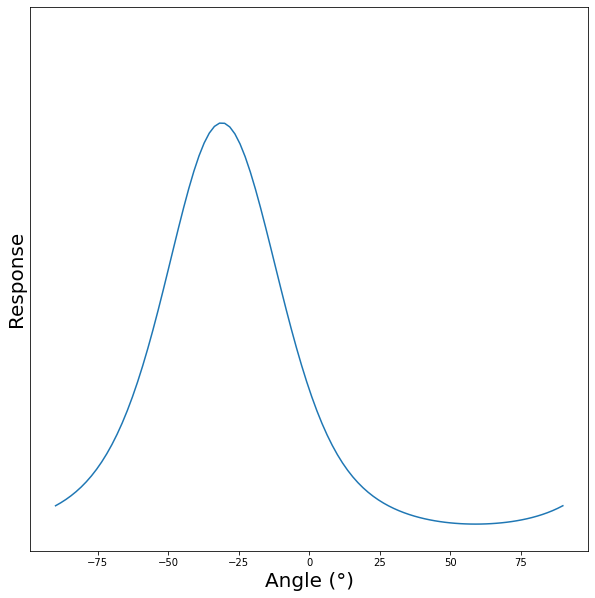

In [79]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25
savepath = 'trained_models/'
model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'


x = np.linspace(-np.pi/2, np.pi/2, 100)
x = (x * 180) / np.pi
plt.figure(figsize = [10, 10])
conv_after_v1_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V1_after_tuning_curve.pt")
conv_before_v1_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V1_before_tuning_curve.pt")
conv_after_v4_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V4_after_tuning_curve.pt")
conv_before_v4_tuning_curve = torch.load(savepath + "conv_high_fixed_normalized" + model + "V4_before_tuning_curve.pt")
plt.plot(x, conv_before_v1_tuning_curve[10, 0, 0, :])
plt.xlabel("Angle (°)", fontsize = 20)
plt.ylabel("Response", fontsize = 20)
plt.yticks([])
plt.ylim(0, 1)
plt.savefig("tuning curve.png")

In [21]:
schoups_v1_mean_before_slopes[6], schoups_v1_mean_after_slopes[6], diff1[6]

(0.005754357203841209, 0.006239761190954596, 0.08435416327463377)

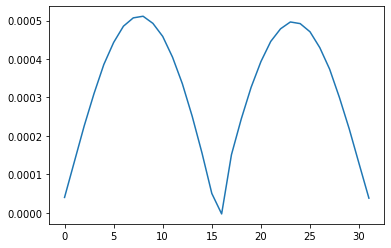

In [25]:
plt.plot([schoups_v1_mean_after_slopes[i] - schoups_v1_mean_before_slopes[i] for i in range(32)])


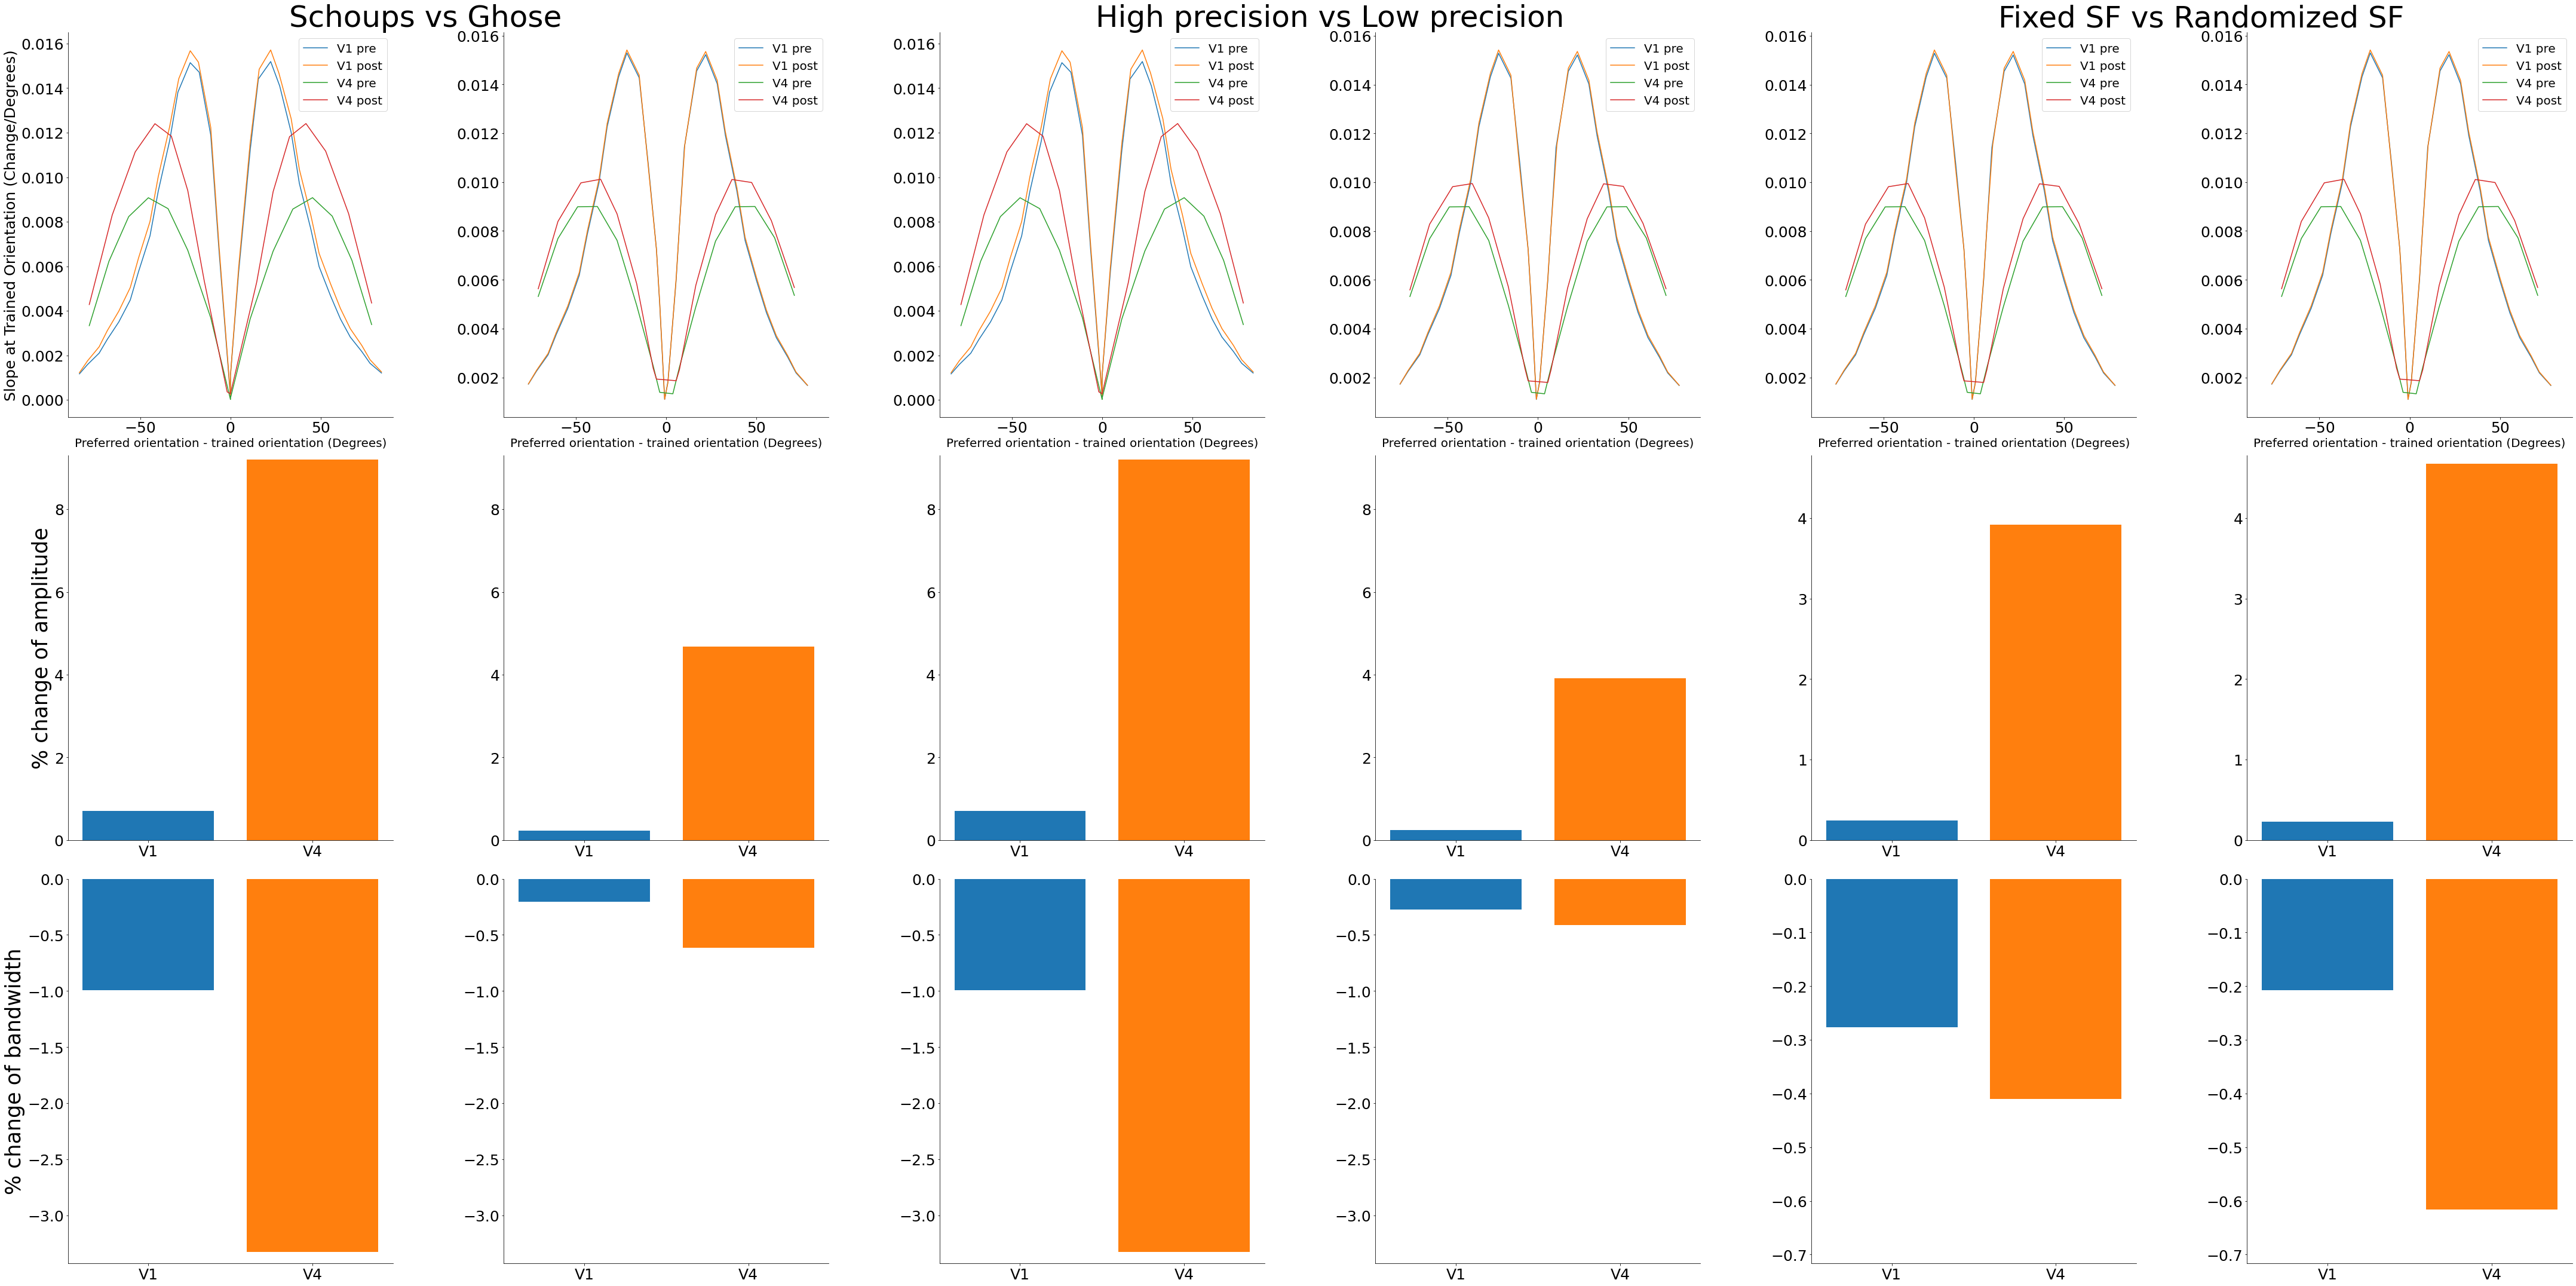

In [74]:
v1_scale = 0.75
phase_scale = 0.01
v4_scale = 1.25

model = '/weight_scale_' + str(v1_scale).replace('.', '') + '_' + str(phase_scale).replace('.', '') + '_' + str(v4_scale).replace('.', '') + '/'


fig, axs = plt.subplots(3, 6, figsize = (60, 30))

schoups_savepath = 'trained_models/high_fixed_normalized_long' + model
ghose_savepath = 'trained_models/low_randomized_normalized_long' + model

schoups_v1_before_range = torch.load(schoups_savepath + "v1_before_range.pt")
schoups_v1_after_range = torch.load(schoups_savepath + "v1_after_range.pt")
schoups_v4_before_range = torch.load(schoups_savepath + "v4_before_range.pt")
schoups_v4_after_range = torch.load(schoups_savepath + "v4_after_range.pt")
schoups_v1_mean_before_slopes = torch.load(schoups_savepath + "v1_mean_before_slopes.pt")
schoups_v1_mean_after_slopes = torch.load(schoups_savepath + "v1_mean_after_slopes.pt")
schoups_v4_before_slopes = torch.load(schoups_savepath + "v4_before_slopes.pt")
schoups_v4_after_slopes = torch.load(schoups_savepath + "v4_after_slopes.pt")
axs[0, 0].set_title("Schoups vs Ghose", fontsize = 50, x = 1.1)
axs[0, 0].plot(schoups_v1_before_range, schoups_v1_mean_before_slopes)
axs[0, 0].plot(schoups_v1_after_range, schoups_v1_mean_after_slopes)
axs[0, 0].plot(schoups_v4_before_range, schoups_v4_before_slopes)
axs[0, 0].plot(schoups_v4_after_range, schoups_v4_after_slopes)
axs[0, 0].set_ylabel("Slope at Trained Orientation (Change/Degrees)", fontsize = 25)


ghose_v1_before_range = torch.load(ghose_savepath + "v1_before_range.pt")
ghose_v1_after_range = torch.load(ghose_savepath + "v1_after_range.pt")
ghose_v4_before_range = torch.load(ghose_savepath + "v4_before_range.pt")
ghose_v4_after_range = torch.load(ghose_savepath + "v4_after_range.pt")
ghose_v1_mean_before_slopes = torch.load(ghose_savepath + "v1_mean_before_slopes.pt")
ghose_v1_mean_after_slopes = torch.load(ghose_savepath + "v1_mean_after_slopes.pt")
ghose_v4_before_slopes = torch.load(ghose_savepath + "v4_before_slopes.pt")
ghose_v4_after_slopes = torch.load(ghose_savepath + "v4_after_slopes.pt")
axs[0, 1].plot(ghose_v1_before_range, ghose_v1_mean_before_slopes)
axs[0, 1].plot(ghose_v1_after_range, ghose_v1_mean_after_slopes)
axs[0, 1].plot(ghose_v4_before_range, ghose_v4_before_slopes)
axs[0, 1].plot(ghose_v4_after_range, ghose_v4_after_slopes)


schoups_v1_amplitude_difference = torch.load(schoups_savepath + "v1_amplitude.pt")
schoups_v4_amplitude_difference = torch.load(schoups_savepath + "v4_amplitude.pt")
ghose_v1_amplitude_difference = torch.load(ghose_savepath + "v1_amplitude.pt")
ghose_v4_amplitude_difference = torch.load(ghose_savepath + "v4_amplitude.pt")
axs[1, 0].bar(["V1", "V4"], [schoups_v1_amplitude_difference, schoups_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 0].set_ylabel("% change of amplitude", fontsize = 35);
axs[1, 0].set_ylim(0, np.max([schoups_v1_amplitude_difference, schoups_v4_amplitude_difference, 
                              ghose_v1_amplitude_difference, ghose_v4_amplitude_difference]) + 0.1)

axs[1, 1].bar(["V1", "V4"], [ghose_v1_amplitude_difference, ghose_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 1].set_ylim(0, np.max([schoups_v1_amplitude_difference, schoups_v4_amplitude_difference, 
                              ghose_v1_amplitude_difference, ghose_v4_amplitude_difference]) + 0.1)

schoups_v1_bandwidth_difference = torch.load(schoups_savepath + "v1_bandwidth.pt")
schoups_v4_bandwidth_difference = torch.load(schoups_savepath + "v4_bandwidth.pt")
ghose_v1_bandwidth_difference = torch.load(ghose_savepath + "v1_bandwidth.pt")
ghose_v4_bandwidth_difference = torch.load(ghose_savepath + "v4_bandwidth.pt")
axs[2, 0].bar(["V1", "V4"], [schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 0].set_ylabel("% change of bandwidth", fontsize = 35);
axs[2, 0].set_ylim(np.min([schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference, 
                           ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference]) - 0.1, 0)

axs[2, 1].bar(["V1", "V4"], [ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 1].set_ylim(np.min([schoups_v1_bandwidth_difference, schoups_v4_bandwidth_difference, 
                           ghose_v1_bandwidth_difference, ghose_v4_bandwidth_difference]) - 0.1, 0)


low_savepath = 'trained_models/low_fixed_normalized_long' + model
high_savepath = 'trained_models/high_fixed_normalized_long' + model


high_v1_before_range = torch.load(high_savepath + "v1_before_range.pt")
high_v1_after_range = torch.load(high_savepath + "v1_after_range.pt")
high_v4_before_range = torch.load(high_savepath + "v4_before_range.pt")
high_v4_after_range = torch.load(high_savepath + "v4_after_range.pt")
high_v1_mean_before_slopes = torch.load(high_savepath + "v1_mean_before_slopes.pt")
high_v1_mean_after_slopes = torch.load(high_savepath + "v1_mean_after_slopes.pt")
high_v4_before_slopes = torch.load(high_savepath + "v4_before_slopes.pt")
high_v4_after_slopes = torch.load(high_savepath + "v4_after_slopes.pt")
axs[0, 2].plot(high_v1_before_range, high_v1_mean_before_slopes)
axs[0, 2].plot(high_v1_after_range, high_v1_mean_after_slopes)
axs[0, 2].plot(high_v4_before_range, high_v4_before_slopes)
axs[0, 2].plot(high_v4_after_range, high_v4_after_slopes)
axs[0, 2].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 20)
axs[0, 2].set_title("High precision vs Low precision", fontsize = 50, x = 1.2)


low_v1_before_range = torch.load(low_savepath + "v1_before_range.pt")
low_v1_after_range = torch.load(low_savepath + "v1_after_range.pt")
low_v4_before_range = torch.load(low_savepath + "v4_before_range.pt")
low_v4_after_range = torch.load(low_savepath + "v4_after_range.pt")
low_v1_mean_before_slopes = torch.load(low_savepath + "v1_mean_before_slopes.pt")
low_v1_mean_after_slopes = torch.load(low_savepath + "v1_mean_after_slopes.pt")
low_v4_before_slopes = torch.load(low_savepath + "v4_before_slopes.pt")
low_v4_after_slopes = torch.load(low_savepath + "v4_after_slopes.pt")
axs[0, 3].plot(low_v1_before_range, low_v1_mean_before_slopes)
axs[0, 3].plot(low_v1_after_range, low_v1_mean_after_slopes)
axs[0, 3].plot(low_v4_before_range, low_v4_before_slopes)
axs[0, 3].plot(low_v4_after_range, low_v4_after_slopes)


low_v1_amplitude_difference = torch.load(low_savepath + "v1_amplitude.pt")
low_v4_amplitude_difference = torch.load(low_savepath + "v4_amplitude.pt")
high_v1_amplitude_difference = torch.load(high_savepath + "v1_amplitude.pt")
high_v4_amplitude_difference = torch.load(high_savepath + "v4_amplitude.pt")
axs[1, 2].bar(["V1", "V4"], [high_v1_amplitude_difference, high_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 2].set_ylim(0, np.max([high_v1_amplitude_difference, high_v4_amplitude_difference, 
                              low_v1_amplitude_difference, low_v4_amplitude_difference]) + 0.1)


axs[1, 3].bar(["V1", "V4"], [low_v1_amplitude_difference, low_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 3].set_ylim(0, np.max([high_v1_amplitude_difference, high_v4_amplitude_difference, 
                              low_v1_amplitude_difference, low_v4_amplitude_difference]) + 0.1)


low_v1_bandwidth_difference = torch.load(low_savepath + "v1_bandwidth.pt")
low_v4_bandwidth_difference = torch.load(low_savepath + "v4_bandwidth.pt")
high_v1_bandwidth_difference = torch.load(high_savepath + "v1_bandwidth.pt")
high_v4_bandwidth_difference = torch.load(high_savepath + "v4_bandwidth.pt")
axs[2, 2].bar(["V1", "V4"], [high_v1_bandwidth_difference, high_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 2].set_ylim(np.min([high_v1_bandwidth_difference, high_v4_bandwidth_difference, 
                           low_v1_bandwidth_difference, low_v4_bandwidth_difference]) - 0.1, 0)


axs[2, 3].bar(["V1", "V4"], [low_v1_bandwidth_difference, low_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 3].set_ylim(np.min([high_v1_bandwidth_difference, high_v4_bandwidth_difference, 
                           low_v1_bandwidth_difference, low_v4_bandwidth_difference]) - 0.1, 0)


fixed_savepath = 'trained_models/low_fixed_normalized_long' + model
randomized_savepath = 'trained_models/low_randomized_normalized_long' + model

fixed_v1_before_range = torch.load(fixed_savepath + "v1_before_range.pt")
fixed_v1_after_range = torch.load(fixed_savepath + "v1_after_range.pt")
fixed_v4_before_range = torch.load(fixed_savepath + "v4_before_range.pt")
fixed_v4_after_range = torch.load(fixed_savepath + "v4_after_range.pt")
fixed_v1_mean_before_slopes = torch.load(fixed_savepath + "v1_mean_before_slopes.pt")
fixed_v1_mean_after_slopes = torch.load(fixed_savepath + "v1_mean_after_slopes.pt")
fixed_v4_before_slopes = torch.load(fixed_savepath + "v4_before_slopes.pt")
fixed_v4_after_slopes = torch.load(fixed_savepath + "v4_after_slopes.pt")
axs[0, 4].set_title("Fixed SF vs Randomized SF", fontsize = 50, x = 1.2)
axs[0, 4].plot(fixed_v1_before_range, fixed_v1_mean_before_slopes)
axs[0, 4].plot(fixed_v1_after_range, fixed_v1_mean_after_slopes)
axs[0, 4].plot(fixed_v4_before_range, fixed_v4_before_slopes)
axs[0, 4].plot(fixed_v4_after_range, fixed_v4_after_slopes)

randomized_v1_before_range = torch.load(randomized_savepath + "v1_before_range.pt")
randomized_v1_after_range = torch.load(randomized_savepath + "v1_after_range.pt")
randomized_v4_before_range = torch.load(randomized_savepath + "v4_before_range.pt")
randomized_v4_after_range = torch.load(randomized_savepath + "v4_after_range.pt")
randomized_v1_mean_before_slopes = torch.load(randomized_savepath + "v1_mean_before_slopes.pt")
randomized_v1_mean_after_slopes = torch.load(randomized_savepath + "v1_mean_after_slopes.pt")
randomized_v4_before_slopes = torch.load(randomized_savepath + "v4_before_slopes.pt")
randomized_v4_after_slopes = torch.load(randomized_savepath + "v4_after_slopes.pt")
axs[0, 5].plot(randomized_v1_before_range, randomized_v1_mean_before_slopes)
axs[0, 5].plot(randomized_v1_after_range, randomized_v1_mean_after_slopes)
axs[0, 5].plot(randomized_v4_before_range, randomized_v4_before_slopes)
axs[0, 5].plot(randomized_v4_after_range, randomized_v4_after_slopes)

fixed_v1_amplitude_difference = torch.load(fixed_savepath + "v1_amplitude.pt")
fixed_v4_amplitude_difference = torch.load(fixed_savepath + "v4_amplitude.pt")
randomized_v1_amplitude_difference = torch.load(randomized_savepath + "v1_amplitude.pt")
randomized_v4_amplitude_difference = torch.load(randomized_savepath + "v4_amplitude.pt")
axs[1, 4].bar(["V1", "V4"], [fixed_v1_amplitude_difference, fixed_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 4].set_ylim(0, np.max([fixed_v1_amplitude_difference, fixed_v4_amplitude_difference, 
                              randomized_v1_amplitude_difference, randomized_v4_amplitude_difference]) + 0.1)

axs[1, 5].bar(["V1", "V4"], [randomized_v1_amplitude_difference, randomized_v4_amplitude_difference], color = ["tab:blue", "tab:orange"]);
axs[1, 5].set_ylim(0, np.max([fixed_v1_amplitude_difference, fixed_v4_amplitude_difference, 
                              randomized_v1_amplitude_difference, randomized_v4_amplitude_difference]) + 0.1)


fixed_v1_bandwidth_difference = torch.load(fixed_savepath + "v1_bandwidth.pt")
fixed_v4_bandwidth_difference = torch.load(fixed_savepath + "v4_bandwidth.pt")
randomized_v1_bandwidth_difference = torch.load(randomized_savepath + "v1_bandwidth.pt")
randomized_v4_bandwidth_difference = torch.load(randomized_savepath + "v4_bandwidth.pt")
axs[2, 4].bar(["V1", "V4"], [fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 4].set_ylim(np.min([fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference, 
                           randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference]) - 0.1, 0)

axs[2, 5].bar(["V1", "V4"], [randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference], color = ["tab:blue", "tab:orange"]);
axs[2, 5].set_ylim(np.min([fixed_v1_bandwidth_difference, fixed_v4_bandwidth_difference, 
                           randomized_v1_bandwidth_difference, randomized_v4_bandwidth_difference]) - 0.1, 0)



for i in range(3):
    for j in range(6):
        axs[i, j].tick_params(axis = 'x', labelsize = 25)
        axs[i, j].tick_params(axis = 'y', labelsize = 25)
        axs[i, j].spines['right'].set_visible(False)
        axs[i, j].spines['top'].set_visible(False)
        axs[0, j].set_xlabel("Preferred orientation - trained orientation (Degrees)", fontsize = 20)
        axs[0, j].legend(["V1 pre", "V1 post", "V4 pre", "V4 post"], fontsize = 20)
        axs[0, j].set_xlim(-90, 90)


plt.tight_layout()
plt.savefig("Fig 3.jpeg")


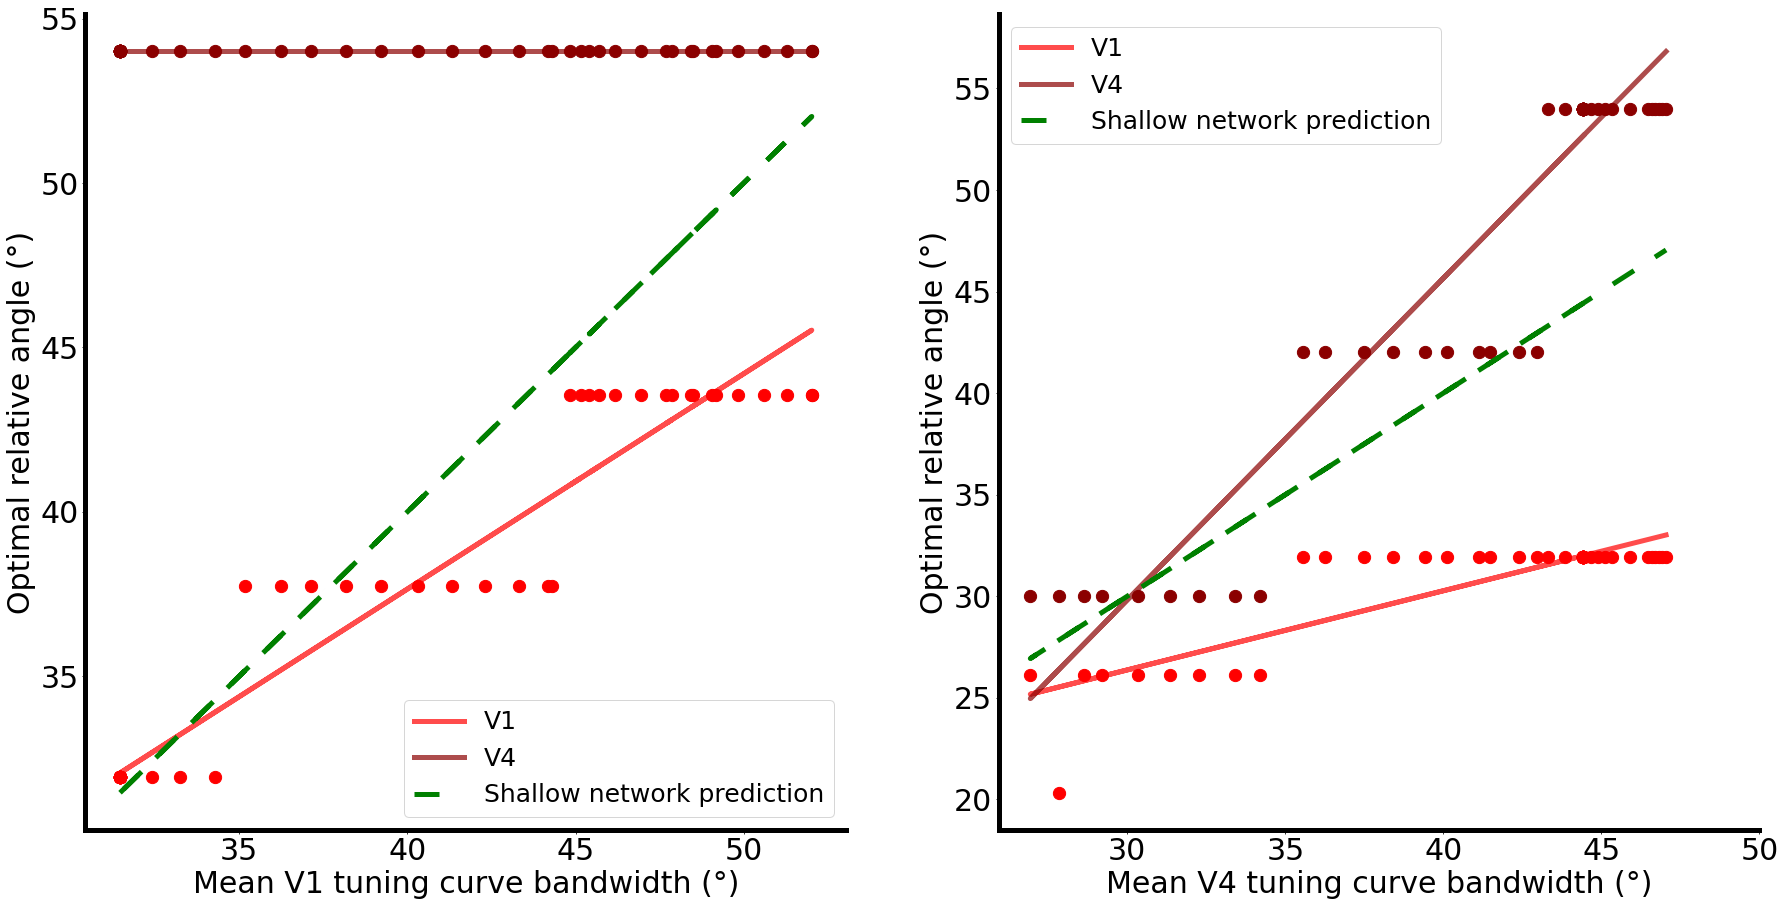

In [11]:
# v1_gammas = [i/10 for i in range(5, 16)]
# v4_orientation_stds = [i/10 for i in range(1, 11)]
v1_gammas = list(np.linspace(0.5, 1.6, 32)) + [0.5] * 32
v4_orientation_stds = [0.7] * 32 + list(np.linspace(0.1, 1, 32))
v1_xs = []
v1_ys = []
v1_v4_ys = []
v4_xs = []
v4_ys = []
v4_v1_ys = []


for i in range(len(v1_gammas)):
    try:
#         v1_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_max_diff_angle.pt'
#         v4_gamma_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v4_max_diff_angle.pt'
#         v1_bandwidth_savepath = 'trained_models/changing_bandwidths_2/' + str(v1_gammas[i]).replace('.', '') + '_07/v1_bandwidth.pt'

        
        v1_gamma_savepath = 'trained_models/conv_changing_bandwidths/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_max_diff_angle.pt'
        v4_gamma_savepath = 'trained_models/conv_changing_bandwidths/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v4_max_diff_angle.pt'
        v1_bandwidth_savepath = 'trained_models/conv_changing_bandwidths/' + str(round(v1_gammas[i], 2)).replace('.', '') + '_07/v1_bandwidth.pt'

        v1_gamma = torch.load(v1_gamma_savepath)
        v4_gamma = torch.load(v4_gamma_savepath)
        v1_bandwidth = torch.load(v1_bandwidth_savepath)

        v1_xs.append(v1_bandwidth)
        v1_ys.append(v1_gamma)
        v1_v4_ys.append(v4_gamma)
    except:
        pass
    
for j in range(len(v4_orientation_stds)):
    try:
        
        v4_orientation_std_savepath = 'trained_models/conv_changing_bandwidths/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_max_diff_angle.pt'
        v1_orientation_std_savepath = 'trained_models/conv_changing_bandwidths/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v1_max_diff_angle.pt'
        v4_bandwidth_savepath = 'trained_models/conv_changing_bandwidths/05_' + str(round(v4_orientation_stds[j], 2)).replace('.', '') + '/v4_bandwidth.pt'

        v4_orientation_std = torch.load(v4_orientation_std_savepath)
        v1_orientation_std = torch.load(v1_orientation_std_savepath)
        v4_bandwidth = torch.load(v4_bandwidth_savepath)

        v4_xs.append(v4_bandwidth)
        v4_ys.append(v4_orientation_std)
        v4_v1_ys.append(v1_orientation_std)

    except:
        pass

fig, axs = plt.subplots(1, 2, figsize = (30, 15))


axs[0].scatter(v1_xs, v1_ys, marker = "o", label = "V1", color = 'red', s = 150, zorder = 2)
m1, b1 = np.polyfit(v1_xs, v1_ys, 1)
axs[0].scatter(v1_xs, v1_v4_ys, marker = "o", label = "V4", color = 'darkred', s = 150, zorder = 2)
m2, b2 = np.polyfit(v1_xs, v1_v4_ys, 1)
axs[0].plot(v1_xs, m1*np.array(v1_xs) + b1, color = 'red', linewidth = 5, alpha = 0.7, zorder = 1)
axs[0].plot(v1_xs, m2*np.array(v1_xs) + b2, color = 'darkred', linewidth = 5, alpha = 0.7, zorder = 1)
axs[0].plot(v1_xs, v1_xs, color = 'g', linestyle = '--', dashes = (5, 5), linewidth = 5)
axs[0].set_xlabel("Mean V1 tuning curve bandwidth (°)", fontsize = 30)
# axs[0].set_title("Effect of changing V1/V4 tuning curve bandwidth on optimal relative angle", x = 1, y = 1.05, fontsize = 30)

axs[1].scatter(v4_xs, v4_v1_ys, marker = "o", label = "V1", color = 'red', s = 150, zorder = 2)
m3, b3 = np.polyfit(v4_xs, v4_v1_ys, 1)
axs[1].scatter(v4_xs, v4_ys, marker = "o", label = "V4", color = 'darkred', s = 150, zorder = 2)
m4, b4 = np.polyfit(v4_xs, v4_ys, 1)
axs[1].plot(v4_xs, m3*np.array(v4_xs) + b3, color = 'red', linewidth = 5, alpha = 0.7, zorder = 1)
axs[1].plot(v4_xs, m4*np.array(v4_xs) + b4, color = 'darkred', linewidth = 5, alpha = 0.7, zorder = 1)
axs[1].plot(v4_xs, v4_xs, color = 'g', linestyle = '--', dashes = (5, 5), linewidth = 5)
axs[1].set_xticks([30, 35, 40, 45, 50])
axs[1].set_xlabel("Mean V4 tuning curve bandwidth (°)", fontsize = 30)



for i in range(2):
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['left'].set_linewidth(5)
    axs[i].spines['bottom'].set_linewidth(5)
    axs[i].legend(["V1", "V4", "Shallow network prediction"], fontsize = 25);
    axs[i].set_ylabel("Optimal relative angle (°)", fontsize = 30)
    axs[i].tick_params(axis = 'x', labelsize = 30)
    axs[i].tick_params(axis = 'y', labelsize = 30)



x = []
y = []
for i in range(len(v1_xs)):
    if v1_xs[i] not in x:
        x.append(v1_xs[i])
        y.append(v1_ys[i])
r = np.corrcoef(x, y)
               
# plt.savefig("Fig 4.jpeg")

In [3]:
(np.linspace(0, np.pi, 10)*180/np.pi)[0]-(np.linspace(0, np.pi, 10)*180/np.pi)[1]

-20.0

In [20]:
angles = [-np.pi/60, np.pi/60]
trained_phis = np.linspace(0, np.pi, 4)*180/np.pi
sfs = [5]
for angle in angles:
     for sf in sfs:
        for i in range(int(16/(2*len(sfs)))):
            theta = angle
            phi = trained_phis[i % len(trained_phis)]
            print(angle, sf, phi)

-0.05235987755982988 5 0.0
-0.05235987755982988 5 59.99999999999999
-0.05235987755982988 5 119.99999999999999
-0.05235987755982988 5 180.0
-0.05235987755982988 5 0.0
-0.05235987755982988 5 59.99999999999999
-0.05235987755982988 5 119.99999999999999
-0.05235987755982988 5 180.0
0.05235987755982988 5 0.0
0.05235987755982988 5 59.99999999999999
0.05235987755982988 5 119.99999999999999
0.05235987755982988 5 180.0
0.05235987755982988 5 0.0
0.05235987755982988 5 59.99999999999999
0.05235987755982988 5 119.99999999999999
0.05235987755982988 5 180.0


In [18]:
np.linspace(0, np.pi, 4)*180/np.pi

array([  0.,  60., 120., 180.])